<h1 style="text-align:center;"> Pattern Recognition - Lab 2 Preparation </h1>
<p style="text-align:center;">Λεωνίδας Αβδελάς, 03113182<br>Χρυσούλα Κοσμά, 03114025<p>

In [2]:
!pip install --upgrade pip #upgrade pip package installer
#!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install --user numpy --upgrade #upgrade numpy package
!pip install --user librosa

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.20.1)
Requirement already up-to-date: numpy in /home/nbuser/.local/lib/python3.6/site-packages (1.15.4)


# STEP 1 #

Για τον πρώτο ομιλητή (άντρας), έχουμε τα παρακάτω αποτελέσματα:

    Για την λέξη "one" και το φώνημα "ou", έχουμε μέσο pitch 133.9Hz.
    Τα formants είναι: 1ο) 566,8Hz, 2o) 1104.9Hz, 3o) 2449.4Hz.
    
    Για την λέξη "one" και το φώνημα "a", έχουμε μέσο pitch 134.5 Hz.
    Τα formants είναι: 1ο) 763Hz, 2o) 1216.3Hz, 3o) 2403.5Hz.
    
    Για την λεξη "two" και το φώνημα "ou", έχουμε μέσο pitch 130 Hz.
    Τα formants είναι: 1ο) 351.5Hz, 2o) 1780.5Hz, 3o) 2371.7Hz.
    
    Για την λεξη "three" και το φώνημα "i", έχουμε μέσο pitch 133.6 Hz.
    Τα formants είναι: 1ο) 387.7Hz, 2o) 1999.8Hz, 3o) 2470.4Hz.

Για τον δεύτερο ομιλητή (γυναίκα), έχουμε τα παρακάτω αποτελέσματα:
    
    Για την λέξη "one" και το φώνημα "ou", έχουμε μέσο pitch 185.8Hz.
    Τα formants είναι: 1ο) 515.3Hz, 2o) 865.5Hz, 3o) 2390.0Hz.
    
    Για την λέξη "one" και το φώνημα "a", έχουμε μέσο pitch 176.5Hz.
    Τα formants είναι: 1ο) 931.1Hz, 2o) 1627.7Hz, 3o) 3035.5Hz.
    
    Για την λεξη "two" και το φώνημα "ou", έχουμε μέσο pitch 189.1Hz.
    Τα formants είναι: 1ο) 368.9Hz, 2o) 1717.5Hz, 3o) 2684.5Hz.
    
    Για την λεξη "three" και το φώνημα "i", έχουμε μέσο pitch 179.2Hz.
    Τα formants είναι: 1ο) 405.9Hz, 2o) 2157.6Hz, 3o) 2930Hz.

Το pitch είναι ένα από τα 3 χαρακτηριστικά της φωνής με τα άλλα δύο να είναι: ο τόνος και ο ρυθμός. Ως pitch ορίζεται η θεμελιώδης συχνότητα δόνησης των φωνητικών χορδών. Διαισθητικά, όσο υψηλότερο είναι το pitch, τόσο πιο λεπτή είναι η φωνή. Αυτόματα, αυτό σημαίνει ότι οι γυναίκες έχουν πιο ψηλό pitch από τους άνδρες, κάτι το οποίο επιβεβαιώνεται και από τα αποτελέσματα μας. 

Τα formants είναι συγκεντρώσεις ενέργειας γύρω από μια συγκεκριμένη συχνότητα στο ακουστικό κύμα. Όλα τα φωνήεντα μπορούν να χαρακτηριστούν από τα πρώτα 2 formants. Οι δύο κατηγορίες που χωρίζονται ανάλογα με το πρώτο formant είναι σε ανοιχτά (open) και κλειστά (closed), που αντιστοιχούν σε φωνήεντα που προφέρονται με ανοιχτό και κλειστό στόμα αντίστοιχα. Οι δύο κατηγορίες που χωρίζονται σύμφωνα με το 2 formant είναι σε μπροστινά (front) και πίσω (back), ανάλογα με την θέση της γλώσσας στο στόμα κατά την εκφώνηση (σχετικά μπορστά και σχετικά πίσω, αντίστοιχα).

Το τρίτο formant μπορεί να βοηθήσει στην αναγνώριση μεταξύ των μπροστινών φωνηέντων. 

Αν γνωρίζαμε τα formants και προσπαθούσαμε να αναγνωρίσουμε το φωνήεν, θα έπρεπε να γνωρίζουμε ότι το F1 έχει μεγαλύτερη συχνότητα για ανοιχτά φωνήεντα (όπως το a) και μικρότερη σε κλειστά (όπως το i & ou). Αντίστοιχα για το F2, έχουμε μεγαλύτερη συχνότητα στα μπροστινά φωνήεντα (όπως το i) και μικρότερη στα πίσω (όπως το ou & a).  Τα παραπάνω επιβεβαιώνονται από τις παρατηρήσεις μας.


Αρχικά, κάνουμε import τις βιβλιοθήκες που είναι απαραίτητες για την εκτέλεση των βημάτων της εργασίας.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import librosa
import seaborn as sns
import os
import re

from librosa import display
from librosa import beat
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from glob import glob

import torch
from torch import nn
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence

# STEP 2 #
Για το βήμα αυτό υλοποιήθηκε η συνάρτηση data_parser που διαβάζει όλα τα αρχεία ήχου που δίνονται μέσα στο φάκελο digits και επιστρέφει 3 λίστες Python, οι οποίες περιέχουν: Το wav που διαβάστηκε με librosa, τον αντίστοιχο
ομιλητή (σε μορφή ακεραίου 1-15) και το ψηφίο στο οποίο αντιστοιχεί (σε μορφή ακεραίου). Συγκεκριμένα, στο εσωτερικό αυτής διαχωρίζουμε το όνομα του αρχείου σε ομιλητή - ψηφίο, χρησιμοποιώντας regular expressions matching για να διαχωρίσουμε λέξη από ψηφίο. Επιπλέον μετατρέπουμε τα ψηφία από μορφή string σε int για να διευκολύνουμε τη χρήση τους ως labels στη συνέχεια. Επιστρέφονται οι λίστες wav_lib,speakers,digits που αντιστοιχούν στις ζητούμενες και επιπλέον το πλήθος n_files των αρχείων που διαβάστηκαν από τον φάκελο. Στην συνάρτηση δίνεται ως όρισμα το path στο οποίο βρίσκεται ο φάκελος με τα αρχεία.

In [4]:
def data_parser(path):
    wav_lib = []
    speakers = []
    digits = []
    n_files = 0
    for filename in os.listdir(path):
        snd, sr = librosa.load(path + '/' + filename,sr=16000)
        wav_lib.append(snd)
        name_wav = os.path.splitext(filename)[0]
        match = re.match(r"([a-z]+)([0-9]+)", name_wav, re.I)
        if match:
            items = match.groups()
        speakers.append(int(items[1]))
        if items[0]=='one':
            digits.append(0)
        elif items[0]=='two':
            digits.append(1)
        elif items[0]=='three':
            digits.append(2)
        elif items[0]=='four':
            digits.append(3)
        elif items[0]=='five':
            digits.append(4)
        elif items[0]=='six':
            digits.append(5)
        elif items[0]=='seven':
            digits.append(6)
        elif items[0]=='eight':
            digits.append(7)
        elif items[0]=='nine':
            digits.append(8)
        n_files = n_files + 1

    return wav_lib,speakers,digits,n_files

In [5]:
path = './digits'
wav_lib, speakers, digits, n_files = data_parser(path)

# STEP 3 #
Η συνάρτηση calc_mfcc_all παίρνει ως είσοδο τη λίστα με όλα τα wav αρχεία που διαβάστηκαν με librosa στο προηγούμενο βήμα, και για καθένα από αυτά εξάγει τα Mel-Frequency Cepstral Coefficients (MFCCs). Συγκερκιμένα, εξάγει 13 χαρακτηριστικά ανά αρχείο και χρησιμοποιεί μήκος παραθύρου 25 ms και βήμα 10 ms. Για το σκοπό αυτό, θέτουμε τις παραμέτρους n_fft 16kHz επί 25msec, hop_length 16kHz επί 10msec. Τα mfcc που εξάγονται για κάθε αρχείο αποθηκεύονται στη λίστα mfccs13. Επίσης, στην ίδια συνάρτηση υπολογίζουμε και την πρώτη και δεύτερη τοπική παράγωγο των χαρακτηριστικών mfcc που εξάγονται για κάθε αρχείο, τις λεγόμενες deltas και delta-deltas. Τα χαρακτηριστικά που αντιστοιχούν στην 1η παράγωγο για κάθε αρχείο αποθηκεύονται στη λίστα mfcc_delta1, ενώ τα χαρακτηριστικά που αντιστοιχούν στην 2η παράγωγο για κάθε αρχείο αποθηκεύονται στη λίστα mfcc_delta2. Η συνάρτηση επιστρέφει τις τρεις λίστες με τα χαρακτηριστικά που εξάγονται για όλα τα αρχεία. 

In [6]:
def calc_mfcc_all(wav_lib):
    sr = 16000
    n_fft = math.floor(sr*0.025)
    hop_length = math.floor(sr*0.01)
    mfcc13 = []
    mfcc_delta1 = []
    mfcc_delta2 = []
    for sound in wav_lib:
        features13 = librosa.feature.mfcc(y=sound, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)
        mfcc13.append(features13)
        features13_delta1 = librosa.feature.delta(features13)
        mfcc_delta1.append(features13_delta1)

        features13_delta2 = librosa.feature.delta(features13_delta1)
        mfcc_delta2.append(features13_delta2)

    return mfcc13, mfcc_delta1, mfcc_delta2

In [7]:
mfcc13, mfcc_delta1, mfcc_delta2 = calc_mfcc_all(wav_lib)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


# STEP 4 #
Στη συνέχεια αναπαριστούμε τα ιστογράμματα του 1ου και του 2ου MFCC των ψηφίων 2 και 5 για όλες τους τις
εκφωνήσεις. Η συνάρτηση find_mfcc1_mfcc2_allspeakers δέχεται ως είσοδο των πίνακα με τα χαρακρηριστικά mfccs που υπολογίστηκαν για όλα τα αρχεία στο Βήμα 3 καθώς και το επιθυμητό ψηφίο προς απεικόνιση. Στο εσωτερικό της, βρίσκει τις θέσεις που βρίσκονται τα χαρακτηριστικά του ψηφίου στον πίνακα mfcc13 για όλες του τι εκφωνήσεις και από τα χαρακτηριστικά αυτά επιλέγει το 1ο και το 2ο. Καθένα από αυτά προστίθεται σε διαφορετικές λίστες για όλες τις εκφωνήσεις του ψηφίου. Οι δύο λίστες με τα 1α mfccs και τα 2α mfccs αντίστοιχα επιστρέφονται από τη συνάρτηση. 

Η συνάρτηση καλείται στη συνέχεια μια φορά για το ψηφίο 2 και μια για το ψηφίο 5. Με τη συνάρτηση distlot του seaborn παρουσιάζουμε σε ένα plot με subplot τα 1α και το 2α mfccs του ψηφίου 2. Σε ένα δεύτερο plot με subplot παρουσιάζουμε τα 1α και το 2α mfccs του ψηφίου 5. Τα αποτελέσματα φαίνονται στη συνέχεια.

In [8]:
def find_mfcc1_mfcc2_allspeakers(mfcc13,n):
    indices = [i for i, x in enumerate(digits) if x == n-1]
    tmp = []
    tmp2 = []
    for i in indices:
        tmp.append(mfcc13[i][1])
        tmp2.append(mfcc13[i][2])

    flat_tmp = [item for sublist in tmp for item in sublist]
    flat_tmp2 = [item for sublist in tmp2 for item in sublist]
    
    return flat_tmp,flat_tmp2,indices

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '2nd Mfcc for digit 2')

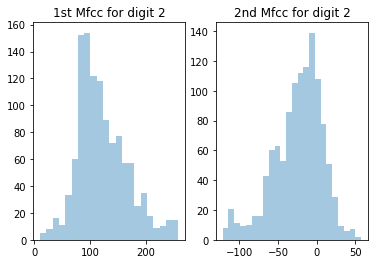

In [9]:
n1 = 2

flat_tmp,flat_tmp2,indices_n1 = find_mfcc1_mfcc2_allspeakers(mfcc13,n1)

f, axes = plt.subplots(1, 2)

sns.distplot(flat_tmp, kde=False, rug=False, ax=axes[0])
axes[0].set_title('1st Mfcc for digit 2')
sns.distplot(flat_tmp2, kde=False, rug=False, ax=axes[1])
axes[1].set_title('2nd Mfcc for digit 2')

Text(0.5, 1.0, '2nd Mfcc for digit 5')

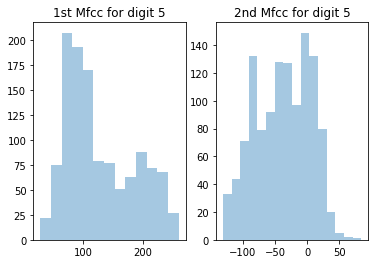

In [10]:
n2 = 5

flat_tmp,flat_tmp2,indices_n2 = find_mfcc1_mfcc2_allspeakers(mfcc13,n2)

f, axes = plt.subplots(1, 2)

sns.distplot(flat_tmp, kde=False, rug=False, ax=axes[0])
axes[0].set_title('1st Mfcc for digit 5')
sns.distplot(flat_tmp2, kde=False, rug=False, ax=axes[1])
axes[1].set_title('2nd Mfcc for digit 5')

Καθώς κάθε MFCC δημιουργείται από από ένα τριγωνικό παράθυρο γώρο από συγκεκριμένο φάσμα συχνοτήτων, αυτό που βλέπουμε είναι ότι στις χαμηλότερες συχνότητες (1o MFCC), έχουμε περισσότερη πληροφορία από ότι στις υψηλότερες. Η απόσταση αυτή είναι εμφανής ακόμα και σε δύο σχετικά μικρά (αρα και κοντινά coefficients) καθώς έχουμε συνολικά μικρό αριθμό MFCC. Άρα η απόκλιση που βλέπουμε είναι 60 μονάδες στην δεύτερη περίπτωση, ενώ στην πρώτη, είναι 20 μονάδες, γιατί υπάρχει αρκετή πληροφορία συγκεντρωμένη και στις υψηλότερες συχνότητες.

Στη συνέχεια, αναπαριστούμε γραφικά τα spectrograms για 2 εκφωνήσεις των n1 και n2 από 2 διαφορετικούς ομιλητές τα mfccs, με τη χρήση της συνάρτησης librosa.display.specshow αφού πρώτα φτιάξουμε σε κλίμακα τα mffcs ώστε να έχουν μηδενική μέση τιμή και διασπορά ίση με ένα.

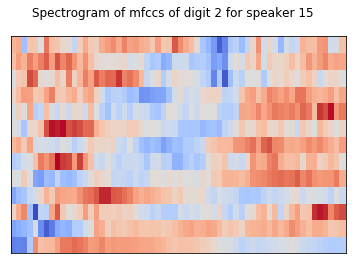

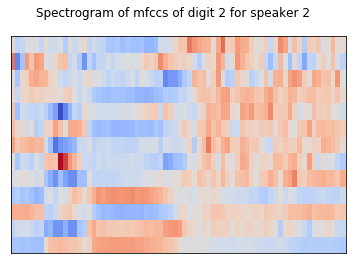

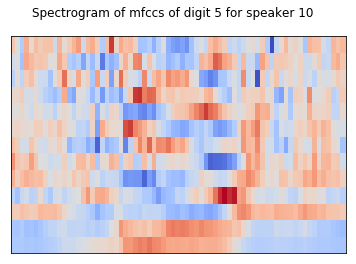

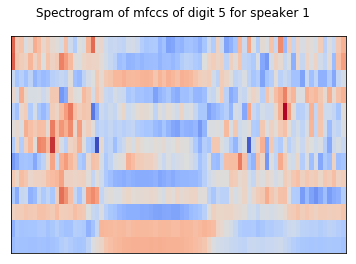

In [11]:
fig = plt.figure()
fig.suptitle('Spectrogram of mfccs of digit '+ str(n1)+ ' for speaker '+str(speakers[indices_n1[0]]))
mfcc = scale(mfcc13[indices_n1[0]],axis=1)
librosa.display.specshow(mfcc, sr=16000)

fig = plt.figure()
fig.suptitle('Spectrogram of mfccs of digit '+ str(n1)+ ' for speaker '+str(speakers[indices_n1[1]]))
mfcc = scale(mfcc13[indices_n1[1]],axis=1)
librosa.display.specshow(mfcc, sr=16000)

fig = plt.figure()
fig.suptitle('Spectrogram of mfccs of digit '+ str(n2)+ ' for speaker '+str(speakers[indices_n2[0]]))
mfcc = scale(mfcc13[indices_n2[0]],axis=1)
librosa.display.specshow(mfcc, sr=16000)

fig = plt.figure()
fig.suptitle('Spectrogram of mfccs of digit '+ str(n2)+ ' for speaker '+str(speakers[indices_n2[1]]))
mfcc = scale(mfcc13[indices_n2[1]],axis=1)
librosa.display.specshow(mfcc, sr=16000)

Τέλος, αναπαριστούμε για 2 εκφωνήσεις των n1 και n2 από 2 διαφορετικούς ομιλητές τα mfccs σε διάγραμμα
με χρωματικό κώδικα, με τη χρήση της συνάρτησης seaborn.heatmap αφού πρώτα φτιάξουμε σε κλίμακα τα mffcs ώστε να έχουν μηδενική μέση τιμή και διασπορά ίση με ένα.

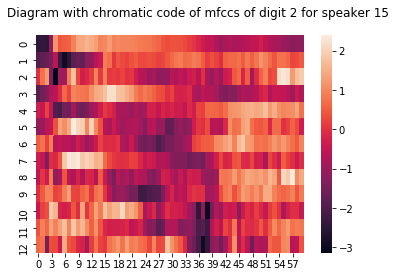

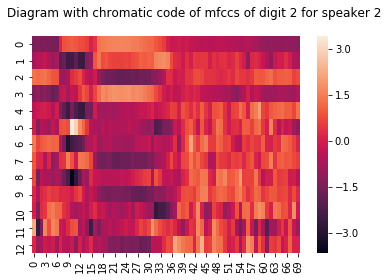

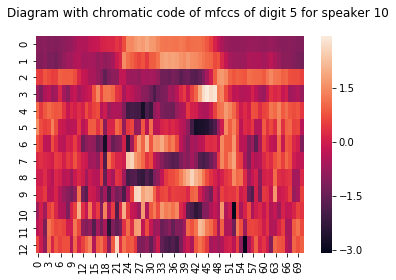

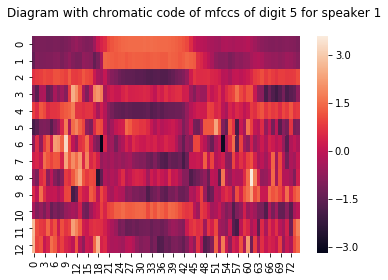

In [12]:
fig = plt.figure()
fig.suptitle('Diagram with chromatic code of mfccs of digit '+ str(n1)+ ' for speaker '+str(speakers[indices_n1[0]]))
mfcc = scale(mfcc13[indices_n1[0]],axis=1)
sns.heatmap(mfcc)

fig = plt.figure()
fig.suptitle('Diagram with chromatic code of mfccs of digit '+ str(n1)+ ' for speaker '+str(speakers[indices_n1[1]]))
mfcc = scale(mfcc13[indices_n1[1]],axis=1)
sns.heatmap(mfcc)

fig = plt.figure()
fig.suptitle('Diagram with chromatic code of mfccs of digit '+ str(n2)+ ' for speaker '+str(speakers[indices_n2[0]]))
mfcc = scale(mfcc13[indices_n2[0]],axis=1)
sns.heatmap(mfcc)

fig = plt.figure()
fig.suptitle('Diagram with chromatic code of mfccs of digit '+ str(n2)+ ' for speaker '+str(speakers[indices_n2[1]]))
mfcc = scale(mfcc13[indices_n2[1]],axis=1)
sns.heatmap(mfcc)

Το πλεονέκτημα του διαγράμματος με color coding είναι ότι οι συχνότητες που περιέχουν περισσότερη πληροφορία αναγνωρίζονται πολύ εύκολα για κάθε MFCC.

Στο spectrogram μπορούμε εύκολα να διακρίνουμε τις ομοιότητες που έχουν τα διάφορα MFCCs μεταξύ των διαφορετικών εκφωνήσεων του κάθε ψηφίου.

Χρησιμοποιούμε τα MFCC, γιατί με αυτή την μέθοδο κρατάμε μόνο την πληροφορία που μας είναι χρήσιμη ώστε να αναγνωρίσουμε αργότερα το ποίο ψηφίο προφέρεται. Έχοντας τον STFT έχουμε μεγάλο όγκο πληροφορίας που μας είναι περιττός και που δεν βοηθάει στην αναγνώριση των ψηφίων.

# STEP 5 #
Αναγκαία για την αναγνώριση των ψηφίων είναι η εξαγωγή ενός μοναδικού διανύσματος χαρακτηριστικών για κάθε εκφώνηση. Για το σκοπό αυτό, στη συνέχεια, ενώνουμε τους πίνακες χαρακτηριστικών mfcc13, mfcc_delta1, mfcc_delta2 για κάθε εκφώνηση και δημιουργούμε ένα διάνυσμα χαρακτηριστικών παίρνοντας τη μέση τιμή και την τυπική απόκλιση κάθε χαρακτηριστικού για όλα τα παράθυρα της εκφώνησης. Χρησιμοποιούμε τις συναρτήσεις np.mean, np.var πάνω στον πίνακα χαρακτηριστικών κάθε εκφώνησης (προκύπτουν διανύσματα διαστάσεων (13,1)) και την np.concetenate για τη συνένωση των επιμέρους χαρακτηριστικών σε ένα ενιαίο διάνυσμα ανά εκφώνηση (διάστασης (78,1), αφού έχουμε 39 χαρακτηριστικά υπολογισμένα με τη μέση τιμή και 39 με την τυπική απόκλιση). Τελικά, το data set που δημιουργούμε είναι ένας numpy array με 133 εκφωνήσεις - δείγματα και 78 χαρακτηριστικά ανά δείγμα, όπως φαίνεται στη συνέχεια.

In [13]:
n_chars = (np.shape(mfcc13[0])[0] + np.shape(mfcc_delta1[0])[0] + np.shape(mfcc_delta2[0])[0])*2

chars_all_wav = np.zeros((n_files,n_chars))

for i in range(0,n_files):
    chars_per_wav = np.concatenate((np.mean(mfcc13[i],axis=1),np.mean(mfcc_delta1[i],axis=1),np.mean(mfcc_delta2[i],axis=1),np.var(mfcc13[i],axis=1),np.var(mfcc_delta1[i],axis=1),np.var(mfcc_delta2[i],axis=1)),axis=None)
    chars_all_wav[i] = chars_per_wav

print("The created Data Set is")
print(chars_all_wav)
print("With samples, features = ",np.shape(chars_all_wav))

The created Data Set is
[[-5.46841479e+02  1.07358426e+02 -3.51343738e+01 ...  1.77131898e-01
   1.18938946e-01  1.57176236e-01]
 [-5.26922007e+02  1.34886984e+02 -9.62986352e+00 ...  1.45186957e-01
   2.04200313e-01  1.72974860e-01]
 [-5.74231417e+02  1.18691485e+02 -1.56159149e+01 ...  1.40331674e-01
   8.85318710e-02  6.25302324e-02]
 ...
 [-5.78035550e+02  1.17519887e+02 -3.98171049e+01 ...  2.03835673e-01
   4.25901066e-01  2.64486735e-01]
 [-5.65448736e+02  1.29706993e+02 -1.06102604e+01 ...  1.85902456e-01
   1.39002627e-01  8.47865600e-02]
 [-5.43813325e+02  1.26146550e+02 -4.95621557e+01 ...  9.13031378e-02
   1.00482764e-01  1.50604432e-01]]
With samples, features =  (133, 78)


Στη συνέχεια, αναπαριστούμε με scatter plot τις τιμές όλων των δειγμάτων του data set για τα 2 πρώτα χαρακτηριστικά. Για το σκοπό αυτό, υλοποιήθηκε η συνάρτηση scatter_plot_2chars η οποία δέχεται ως ορίσματα τις δύο πρώτες γραμμές του data set με τις τιμές των δειγμάτων στα 2 πρώτα χαρακτηριστικά καθώς και τον τίτλο που επιθυμούμε να έχει η γραφική παράσταση. Χρησιμοποιούμε την plt.scatter η οποία για κάθε δείγμα παίρνει τις συντεταγμένες του σημείου του στο scatter plot και το απεικονίζει σε αυτό με το χρώμα που αντιστοιχεί στην κατηγορία που ανήκει. Για να αντιστοιχιστεί στην κατάληλλη κατηγορία κάθε δείγμα, γίνεται ο σχετικός έλεγχος για το label του δείγματος στον πίνακα digits που εριέχει τα labels.

Το scatter plot για τα δύο πρώτα χαρακτηριστικά παρουσιάζεται στη συνέχεια.

In [14]:
def scatter_plot_2chars(X_new, digits, title):
    X0, X1 = X_new[:, 0], X_new[:, 1]
    fig,ax = plt.subplots()
    colour_label = ['blue','red','green','pink','black','yellow','orange','grey','purple']

    count = 0
    for label_d in range(9):
        indices_d = [i for i, x in enumerate(digits) if x == label_d]
        count_labels = 0
        for j in indices_d:
            if count_labels == 0:
                plt.scatter(X0[j], X1[j],c=colour_label[count],label = digits[j]+1,s=60, alpha=0.9, edgecolors='k')
            else:
                plt.scatter(X0[j], X1[j],c=colour_label[count],s=60, alpha=0.9, edgecolors='k')
            count_labels = count_labels + 1
        count = count + 1

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    return plt

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

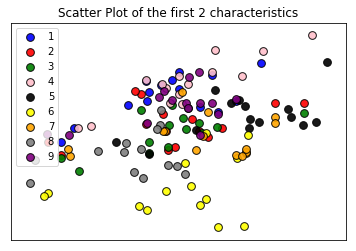

In [15]:
X_new = chars_all_wav[:,[0,1]]
title = "Scatter Plot of the first 2 characteristics"
scatter_plot_2chars(X_new, digits, title)

Παρατηρούμε ότι στο scatter plot που προκύπτει, χρησιμοποιώντας δύο τυχαία χαρακτηριστικά για όλα τα δείγματα, δεν είναι εφικτός ο διαχωρισμός των δειγμάτων στις διάφορες κατηγορίες ψηφίων. Για το σχεδιασμό της επιφάνειας διαχωρισμού των διαφόρων κατηγοριών κανονικά χρειαζόμαστε όλα τα χαρακτηριστικά (ή όσο το δυνατόν περισσότερα) για να μπορέσουμε να σχολιάσουμε τις θέσεις των ψηφίων ως προς τις περιοχές που αυτά ορίζουν στην επιφάνεια. Αυτό οφείλεται στο γεγονός ότι οι τιμές των δειγμάτων κάποιου ψηφίου πιθανόν να διαφέρουν σε μεγάλο βαθμό ως προς τα δύο τυχαία χαρακτηριστικά που επιλέχθηκαν και να τοποθετούνται σε αρκετά διαφορετικά σημεία στις 2 περιοχές. 

Παρόλη αυτή την αστοχία, που οφείλεται στα ελλιπή χαρακτηριστικά που χρησιμοποιούνται, παρατηρούμε ότι αρκετά δείγματα που ανήκουν στην ίδια κατηγορία τείνουν να συγκεντρώνονται σε μια περιοχή στο διάγραμμα.

# STEP 6 #
Για να πετύχουμε καλύτερα αποτελέσματα όσον αφορά των διαχωρισμό των διαφόρων κατηγοριών των ψηφίων στο scatter plot θα μειώσουμε τις διαστάσεών τους με την τεχνική Principal Component Analysis (PCA). Χρησιμοποιούμε το έτοιμο μοντέλο του scikit-learn για PCA. Αρχικά, μειώνουμε σε 2 τις διαστάσεις των διανυσμάτων του προηγούμενου
βήματος με PCA και δημιουργούμε εκ νέου το scatter plot με τη χρήση της συνάρτησης scatter_plot_2chars για δύο χαρακτηριστικά που δημιουργήσαμε. Το αποτέλεσμα της γραφικής παράστασης παρουσιάζεται στη συνέχεια.

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

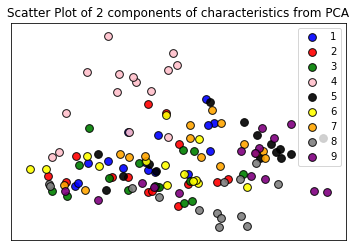

In [16]:
pca = PCA(n_components=2)
pca.fit(chars_all_wav)
X_new = pca.transform(chars_all_wav)
title = "Scatter Plot of 2 components of characteristics from PCA"
scatter_plot_2chars(X_new, digits, title)

Παρατηρούμε μια μικρή βελτίωση στη συγκέντρωση των δειγμάτων, που ανήκουν στην ίδια κατηγορία,σε μια περιοχή. Ωστόσο, συνεχίζουν να παρατηρούνται μεγάλες αποκλίσεις.  

Στη συνέχεια, επαναλαμβάνουμε τη διαδικασία για 3 διαστάσεις και μειώνουμε τις διαστάσεις των διανυσμάτων του αρχικού data set με PCA. Επίσης, με τη χρήση της scatter_plot_3chars σχεδιάζουμε το τρισδιάστατο scatter plot για το σχεδιασμό των νέων διανυσμάτων χαρακτηριστικών κάθε δείγματος. Η συνάρτηση αυτή ακολουθεί ακριβώς την ίδια διαδικασία με την scatter_plot_2chars με τη διαφορά ότι όταν καλεί την plt.scatter χρησιμοποιεί 3 συντεταγμένες αντί για 2, ώστε να προκύψει το 3D plot. Το αποτέλεσμα της 3D scatter plot παρουσιάζεται στη συνέχεια.

In [17]:
def scatter_plot_3chars(X_new, digits, title):
    X0, X1, X2 = X_new[:, 0], X_new[:, 1], X_new[:, 2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colour_label = ['blue','red','green','pink','black','yellow','orange','grey','purple']

    count = 0
    for label_d in range(9):
        indices_d = [i for i, x in enumerate(digits) if x == label_d]
        count_labels = 0
        for j in indices_d:
            if count_labels == 0:
                ax.scatter(X0[j], X1[j], X2[j], c=colour_label[count],label = digits[j]+1,s=60, alpha=0.9, edgecolors='k')
            else:
                ax.scatter(X0[j], X1[j], X2[j], c=colour_label[count],s=60, alpha=0.9, edgecolors='k')
            count_labels = count_labels + 1
        count = count + 1

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())
    ax.set_title(title)
    ax.legend()
    return plt


<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py'>

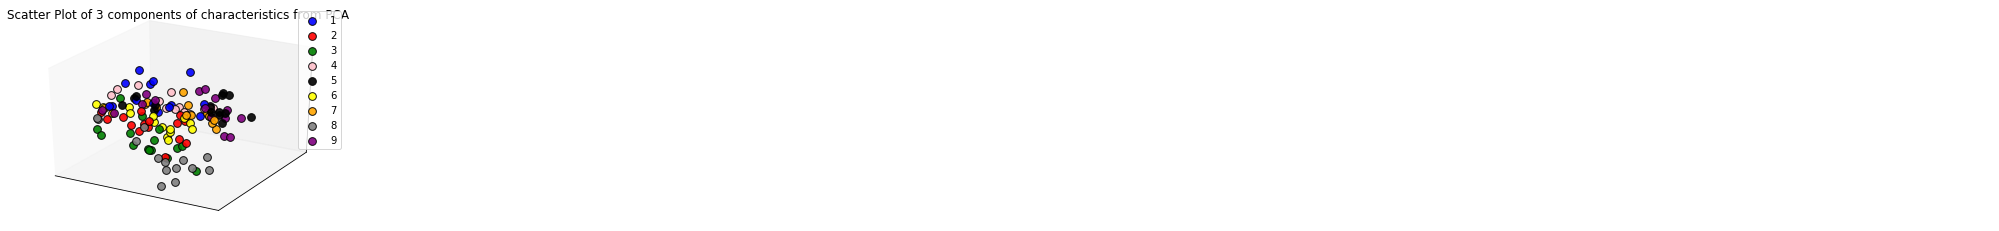

In [18]:
pca = PCA(n_components=3)
pca.fit(chars_all_wav)
X_new = pca.transform(chars_all_wav)
title = "Scatter Plot of 3 components of characteristics from PCA"
scatter_plot_3chars(X_new, digits, title)

Παρατηρούμε ότι για 3 συνιστώσες από PCA το scatter plot βελτιώνεται αρκετά ως προς τον διαχωρισμό των δειγμάτων στις διάφορες κατηγορίες. Επίσης, τα περισσότερα δείγματα με ίδιο label συγκεντρώνονται σε κοινές περιοχές με μικρές αποκλίσεις.

Με την τεχνική PCA μειώνουμε τις διαστάσεις, βρίσκοντας ένα νέο σύνολο χαρακτηριστικών - συνιστωσών, οι οποίες είναι σύνθετες από τα αρχικά χαρακτηριστικά, αλλά δεν συνδέονται μεταξύ τους. Συγκεκριμένα, το PCA υπολογίζει ένα νέο σύνολο μεταβλητών (κύριες συνιστώσες) και εκφράζει τα δεδομένα με βάση αυτές τις νέες μεταβλητές. Οι νέες μεταβλητές αντιπροσωπεύουν την ίδια ποσότητα πληροφοριών με τις αρχικές μεταβλητές. Επιπλέον, η συνολική διασπορά παραμένει η ίδια. Ωστόσο, ανακατανέμεται μεταξύ των νέων μεταβλητών με τον πιο «άνισο» τρόπο: η πρώτη μεταβλητή όχι μόνο εκφράζει τη μεγαλύτερη διασπορά μεταξύ των νέων μεταβλητών, αλλά και τη μεγαλύτερη διασπορά που μπορεί να εξηγήσει μια μεμονωμένη μεταβλητή. Η πρώτη συνιστώσα αντιπροσωπεύει τη μεγαλύτερη δυνατή διασπορά στα δεδομένα, η δεύτερη αντιπροσωπεύειτη δεύτερη μεγαλύτερη διασπορά κλπ. 

# STEP 7 #
Για την δημιουργία των train, test sets χρησιμοποιούμε τη συνάρτηση train_test_split του scikit-learn με ποσοστό 70%,30% αντίστοιχα, γι' αυτό επιλέγουμε test_size=0.3. Η συνάρτηση επιστρέφει τα X_train, X_test και τους πίνακες με τα αντίστοιχα labels y_train, y_test ενώ παίρνει ως είσοδο ολόκληρο το data set (πίνακας chars_all_wav) που δημιουργήσαμε στο Βήμα 5 και τα labels που αντιστοιχούν στα δείγματα (πίνακας digits). Στη συνέχεια, κανονικοποιούμε τις τιμές των χαρακτηριστικών στα σύνολα X_train, X_test με τη χρήση του μοντέλου MinMaxScaler σε έυρος (-1,1). Η κανονικοποίηση πραγματοποιείται μετά το διαχωρισμό του data set σε train, test ώστε να μην μεταφερθεί πληροφορία για τις τιμές των χαρακτηριστικών του συνόλου train στο test.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(chars_all_wav, np.asarray(digits), test_size=0.3, random_state=42)
print("Dimensions of X_train are", np.shape(X_train))
print("Dimensions of X_test are", np.shape(X_test))
print("Dimensions of Y_train are", np.shape(y_train))
print("Dimensions of Y_test are", np.shape(y_test))
'''
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) '''

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
'''
X_train = scale(X_train)
X_test = scale(X_test) '''

Dimensions of X_train are (93, 78)
Dimensions of X_test are (40, 78)
Dimensions of Y_train are (93,)
Dimensions of Y_test are (40,)


'\nX_train = scale(X_train)\nX_test = scale(X_test) '

Στη συνέχεια εισάγουμε την κλάση του μοντέλου BayesianClassifier που δημιουργήσαμε στα πλαίσια της πρώτης εργαστηριακής άσκησης. Κάνουμε fit τον ταξινομητή πάνω στο train set και υπολογίζουμε το score στα predictions για το test set, με τη βοήθεια των έτοιμων συναρτήσεων της κλάσης του μοντέλου. Ακολουθούμε την ίδια διαδικασία για τον Naive Bayes του scikit-learn. Χρησιμοποιούμε επίσης για την ταξινόμηση του test set του έτοιμους ταξινομητές KNeighborsClassifier, svm.SVC με kernel='linear' και DecisionTreeClassifier. Τα ποσοστά που πετυχαίνουν οι ταξινομητές που χρησιμοποιούμε εμφανίζονται στη συνέχεια.

In [20]:
class BayesianClassifier(BaseEstimator, ClassifierMixin):  

    def __init__(self):
        self.X_mean_ = None
        self.X_variance_ = None
        self.a_priori_ = None

    def calculate_a_priori(self, Y_train):
        a_priori_dict = dict()
        labels = len(np.unique(Y_train))
        res_a_priori = np.zeros(labels)

        n = Y_train.shape[0]
        for item in Y_train:
            if item in a_priori_dict:
                a_priori_dict[item] += 1
            else:
                a_priori_dict[item] = 1

        for key,value in a_priori_dict.items():
            a_priori_dict[key] = value/n
        sortapriori = sorted(a_priori_dict)
        for key in sortapriori:
            res_a_priori[int(key)] = a_priori_dict[key]
        return res_a_priori

    def fit(self, X, y, forced_variance = None):
        
        X, y = check_X_y(X, y)
        
        labels = len(np.unique(y))
        
        self.X_mean_ = np.zeros((labels, X.shape[1]))
        self.X_variance_ = np.zeros((labels, X.shape[1]))
        self.a_priori_ = self.calculate_a_priori(y)
        for i in range(labels):
            class_data = X[y == i]
            for j in range(X.shape[1]):
                self.X_mean_[i,j] = np.average(class_data[:,j])
                if forced_variance == None:
                    self.X_variance_[i,j] = np.var(class_data[:,j])
                else:
                    self.X_variance_[i,j] = 1
                
            
        return self

    def calculateProbability(self, x, mean, var):
        exponent = math.exp(-(math.pow(x-mean,2)/(2*var)))
        return (1 / (math.sqrt(2*math.pi * var))) * exponent

    def predict(self, X):
        
        try:
            getattr(self, "X_mean_")
            getattr(self, "X_variance_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        
        prob = np.zeros(9)
        class_predictions = np.zeros(X.shape[0])
        for i in range(class_predictions.shape[0]):
            test_sample = X[i,:]
            for j in range(9): 
                prob[j] = 1
               
                for k in range(test_sample.shape[0]):
                    if self.X_variance_[j,k] == 0:
                        continue
                    x = test_sample[k]
                    mean = self.X_mean_[j,k]
                    var = self.X_variance_[j,k]
                    
                    curr_prob = self.calculateProbability(x , mean, var)
                    prob[j] *= curr_prob      
                prob[j] *= self.a_priori_[j]
            class_predictions[i] = np.argmax(prob) # find the biggest probability
        return class_predictions
    
    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        return accuracy_score(y, self.predict(X))

In [21]:
custom_gauss = BayesianClassifier()
custom_gauss.fit(X_train, y_train)
score0 = custom_gauss.score(X_test, y_test)
print("Success rate of our Naive Bayes is",score0*100,"%")

Success rate of our Naive Bayes is 47.5 %


In [22]:
clf_gauss = GaussianNB()
clf_gauss.fit(X_train, y_train)
score1 = clf_gauss.score(X_test, y_test)
print("Success rate of scikit-learn GaussianNB is",score1*100,"%")

clf_kneigh = KNeighborsClassifier()
clf_kneigh.fit(X_train, y_train)
score2 = clf_kneigh.score(X_test,y_test)
print("Success rate of scikit-learn KNeighborsClassifier is",score2*100,"%")

clf_linear = svm.SVC(kernel='linear', probability = True, random_state=100)
clf_linear.fit(X_train, y_train)
score3 = clf_linear.score(X_test,y_test)
print("Success rate of scikit-learn svm with kernel='linear' is",score3*100,"%")

clf_tree = DecisionTreeClassifier(random_state=100)
clf_tree.fit(X_train, y_train)
score4 = clf_tree.score(X_test,y_test)
print("Success rate of scikit-learn DecisionTreeClassifier is",score4*100,"%")

Success rate of scikit-learn GaussianNB is 47.5 %
Success rate of scikit-learn KNeighborsClassifier is 37.5 %
Success rate of scikit-learn svm with kernel='linear' is 62.5 %
Success rate of scikit-learn DecisionTreeClassifier is 45.0 %


Παρατηρούμε ότι το μεγαλύτερο ποσοστό παρουσιάζει ο SVM Classifier με kernel='linear'. Ακολουθούν οι δύο Naive bayes Classifiers (ο δικός μας και του scikit-learn) με ίδιο ποσοστό επιτυχίας. Στη συνέχεια, έχουμε τον KNeighbors Classifier και τέλος τον DecisionTree Classifier, που παρουσιάζουν σχετικά μικρά ποσοστά σε σχέση με τους προηγούμενους. Παρατηρούμε, σχετικά μεγάλες αποκλίσεις στα ποσοσστά επιτυχίας που εμφανίζουν οι διάφοροι ταξινομητές και επίσης παρατηρήσαμε αρκετά χαμηλά ποσοστά σε άλλα είδη ταξινομητών που δοκιμάσαμε πριν την τελική επιλογή. Στο γεγονός αυτό οφείλεται το μικρό μέγεθος training set που χρησιμοποιούμε για την εκπαίδευση των μοντέλων.

Βάσει των παραπάνω αποτελεσμάτων αλλά και της εμπειρίας μας, σε μικρά training sets είναι πιο αποτελεσματικά μοντέλα high bias/low variance (όπως ο Naive Bayes) σε σχέση με μοντέλα low bias/high variance (όπως ο κΝΝ), καθώς ο τελευταίος κάνει overfitting. Επιπλέον, ο Decision Tree Classifier δεν ενδύκνειται για μικρά data sets, καθώς τα greedy χαρακτηριστικά του μπορεί να οδηγήσουν σε overfitting. Από την άλλη ο SVM με κατάλληλο kernel μπορεί να διαχειριστεί πιο αποτελεσματικά μικρά data sets, γιατί χρησιμοποιεί support vectors (όχι όλα τα δείγματα) για δημιουργήσει το υπερεπίπεδο διαχωρισμού.

# STEP 8 #
Για την υλοποίηση του Αναδρομικού Νευρωνικού Δικτύου (Recurrent Neural Network – RNN), χρησιμοποιήθηκε ως βάση ο βοηθητικός κώδικας που δόθηκε και δημιουργήθηκε μια κλάση class BasicLSTM(nn.Module) με τις μεθόδους init,forward. Για την εφαρμογή ενός στρώματος σε μια ακολουθία σημείων χρησιμοποιείται η συνάρτηση apply_layer_to_timesteps, η οποία βρισκόταν επίσης στο βοηθητικό υλικό. Ακολουθούν σε διαφορετικά cells η υπολοποίηση της συνάρτησης apply_layer_to_timesteps, η υλοποιήηση της κλάσης του RNN και τέλος η παραγωγή των ακολουθιών 10 σημείων ενός ημιτόνου και ενός συνημιτόνου με συχνότητα f = 40 Hz μαζί με το train loop. 

Στο train loop πραγματοποιείται η εκπαίδευση του RNN που υλοποιήσαμε, τροφοδοτώντας το κάθε φορά με μια ακολουθία 10 σημείων ημιτόνου. Το νευρωνικό επιστρέφει μια πρόβλεψη για την αντίστοιχη ακολουθία συνημιτόνου, και υπολογίζεται το MSE loss (μέσο τετραγωγικό σφάλμα) σε σχέση με την πραγματική  ακολουθία συνημιτόνου που αντιστοιχεί στην ακολουθία. Κάνουμε back propagation στο λάθος με την loss.backward(). Για την ανανέωση των βαρών του νευρωνικού χρησιμοποιούμε την optimizer.step() με τον optimizer torch.optim.Adam. Η κλίση του .backward() συσσωρεύει τα gradients για κάθε παράμετρο, γι' αυτό καλούμε την optimizer.zero_grad() για κάθε κλήση της .step().

Επιλέγουμε τις εξής παραμέτρους τις οποίες και θέτουμε πριν το train loop: INPUT_SIZE = 1 (rnn input size), TIME_STEP = 10 (rnn time step), LR = 0.02 (learning rate), hidden_dim = 32 (number of features in the hidden state h), num_layers = 2 (number of recurrent layer), output_dim = 1 (rnn output size). 

Για την δημιουργία των ακολουθιών ημιτόνου, συνημιτόνου επιλέγουμε: 
f = 40 (συχνότητα για τις ακολουθίες ημιτόνου, συνημιτόνου), len_seq = 10 (πλήθος σημείων κάθε ακολουθίας), n_samples = 100 (πλήθος διαφορετικών ακολουθιών ημιτόνου, συνημιτόνου), step = 0.001 (απόσταση ανάμεσα στα διαδοχικά σημεία κάθε ακολουθίας).

Σε κάθε κύκλο του train loop δημιουργούμε σε κοινή γραφική παράσταση την πρόβλεψη για το συνημίτονο για μια συγκεκριμένη ακολουθία σημείων και το πραγματικό συνημίτονο που τους αντιστοιχεί. Βλέπουμε ότι με σταδιακά η πρόβλεψη συγκλίνει στην πραγματική ακολουθία.

Χρησιμοποιούμε RNN/LSTM γιατί τα δίκτυα LSTM είναι πολύ καλά στην διατήρηση μακροπρόθεσμης μνήμης. Με άλλα λόγια, η πρόβλεψη του nth δείγματος σε μια ακολουθία δειγμάτων μπορεί να επηρεαστεί από μια είσοδο που δόθηκε πριν από πολλά βήματα. Το δίκτυο μπορεί να αποθηκεύσει ή να απελευθερώσει μνήμη εν κινήσει μέσω του μηχανισμού πύλης.Το LSTM είναι μια καλή επιλογή για τέτοιες αλληλουχίες δεδομένων, που έχουν μακροχρόνιες εξαρτήσεις σε αυτό. Πιο αναλυτικά, κατά τη διάρκεια του back propagation, τα RNN υποφέρουν από το λεγόμενο πρόβλημα "vanishing gradient problem". Τα gradients είναι οι τιμές που χρησιμοποιούνται για την ενημέρωση των βαρών των νευρωνικών δικτύων. Το "vanishing gradient problem" είναι όταν το gradient συρρικνώνεται καθώς μεταδίδεται πίσω στο πέρασμα του χρόνου. Εάν μια τιμή gradient γίνεται εξαιρετικά μικρή, δεν συμβάλλει πολύ στην εκμάθηση. Στα RNN τα στρώματα που λαμβάνουν μια μικρή ενημέρωση gradient σταματούν να μαθαίνουν και σε μεγάλες ακολουθίες αυτό οδηγεί σε short term memory. Τα LSTM, GRU έχουν εσωτερικούς μηχανισμούς που ονομάζονται πύλες και μπορούν να ρυθμίσουν τη ροή πληροφορίας.

In [23]:
# Help for Step 8

# 1) Use MSE loss function
# 2) Inside the train loop, if you shaped your input features into a 2D array, 
#    augment their dimensionality by 1 before feeding a batch of them in the LSTM as the batch must be a 3D array, not 2D.
#    The command for doing this is: your_batch.unsqueeze_(-1)
#    and it is an inplace operation, you don't have to assign it to a new variable
#    In the same way, you must .squeeze_() the outputs of the LSTM to reshape them into a 2D array.
# 3) In order to apply a neural network layer to a sequence you must use the given function: apply_layer_to_timesteps
# 4) The input sequences in the main part of the exercise will not be of the same length. For this reason, we use
#    the PyTorch helper functions: pack_padded_sequence and pad_packed sequence. Note that these functions do not pad
#    the sequences, we still have to do this operation manually before feeding the data into the LSTM.

def apply_layer_to_timesteps(x, layer, batch_first=True):
    # Reshape x into a flat array
    x_reshape = x.contiguous().view(-1, x.size(-1))
    # Apply the layer
    y = layer(x_reshape)
    # Reshape y to previous form
    if batch_first:
        y = y.contiguous().view(x.size(0), -1, y.size(-1))  # (samples, timesteps, output_size)
    else:
        y = y.view(-1, x.size(1), y.size(-1))  # (timesteps, samples, output_size)

    return y
  
class BasicLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim = 1, num_layers=2):
        super(BasicLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        # Implement the init function

    def forward(self, features, lengths, batch_first):
        """ Features: N x L x D
            N: batch index
            L: sequence index
            D: feature index
            lengths: N x 1 -> lengths of sequences (needed for pack_padded_sequence nad pad_packed_sequence)
         """
        # Use pack_padded_sequence to create a PackedSequence for inputs of different length
        packed = pack_padded_sequence(features, lengths, batch_first=True)
        # Pass the whole packed sequence from the LSTM
        # The LSTM also returns the hidden state which we do not need here
        output, _ = self.lstm(packed)
        # Return output in the same form as the input we gave in the pack_padded_sequence function
        output, _ = pad_packed_sequence(output, batch_first=True)
        
        y_pred = apply_layer_to_timesteps(output, self.linear, batch_first)
        return y_pred.view(-1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0314, -0.0298, -0.0311, -0.0342, -0.0378, -0.0410, -0.0433, -0.0442,
        -0.0437, -0.0417], grad_fn=<ViewBackward>)


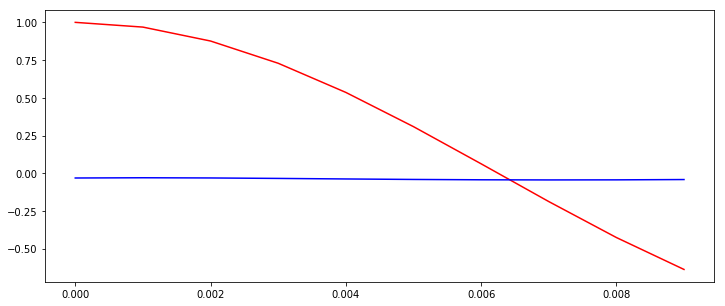

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([0.0448, 0.0946, 0.1294, 0.1523, 0.1670, 0.1765, 0.1826, 0.1866, 0.1895,
        0.1920], grad_fn=<ViewBackward>)


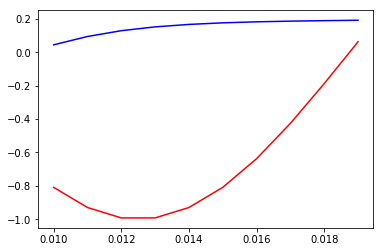

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.0085,  0.0132,  0.0327,  0.0491,  0.0632,  0.0753,  0.0856,  0.0940,
         0.1001,  0.1038], grad_fn=<ViewBackward>)


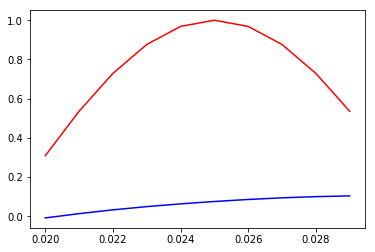

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([0.0411, 0.0749, 0.0893, 0.0929, 0.0910, 0.0868, 0.0819, 0.0770, 0.0724,
        0.0686], grad_fn=<ViewBackward>)


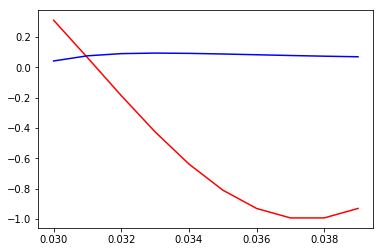

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0016,  0.0195,  0.0347,  0.0457,  0.0540,  0.0610,  0.0672,  0.0727,
         0.0773,  0.0806], grad_fn=<ViewBackward>)


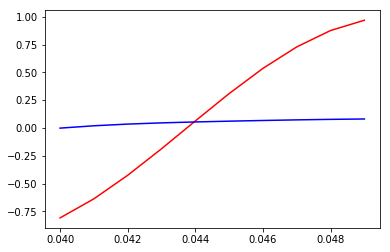

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([ 0.0008,  0.0216,  0.0299,  0.0279,  0.0193,  0.0072, -0.0054, -0.0167,
        -0.0253, -0.0301], grad_fn=<ViewBackward>)


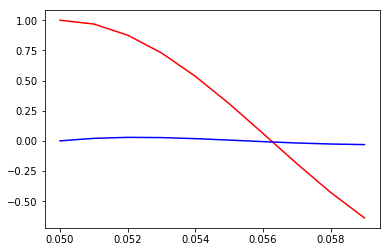

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([0.0021, 0.0041, 0.0025, 0.0063, 0.0168, 0.0327, 0.0512, 0.0699, 0.0872,
        0.1018], grad_fn=<ViewBackward>)


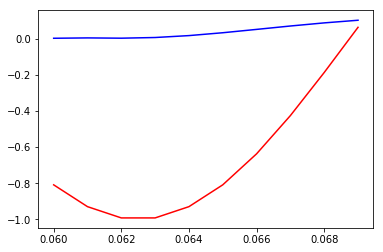

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.0095,  0.0306,  0.0627,  0.0813,  0.0869,  0.0809,  0.0646,  0.0399,
         0.0091, -0.0249], grad_fn=<ViewBackward>)


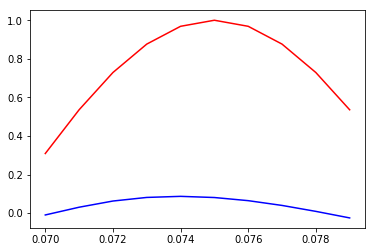

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([-0.0173, -0.0504, -0.0940, -0.1318, -0.1574, -0.1691, -0.1667, -0.1509,
        -0.1226, -0.0841], grad_fn=<ViewBackward>)


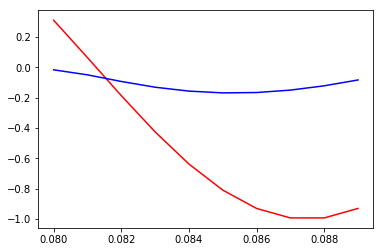

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0059,  0.0390,  0.0882,  0.1341,  0.1725,  0.2019,  0.2217,  0.2319,
         0.2320,  0.2210], grad_fn=<ViewBackward>)


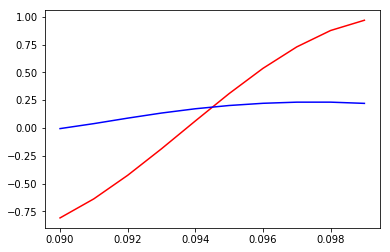

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0203, -0.0213, -0.0494, -0.1040, -0.1776, -0.2598, -0.3397, -0.4090,
        -0.4631, -0.5004], grad_fn=<ViewBackward>)


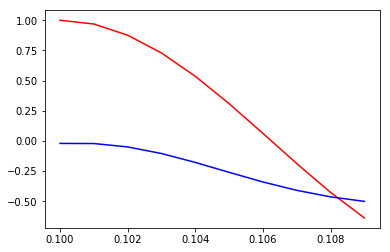

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([-0.0327, -0.0757, -0.1129, -0.1243, -0.1035, -0.0512,  0.0258,  0.1156,
         0.2043,  0.2815], grad_fn=<ViewBackward>)


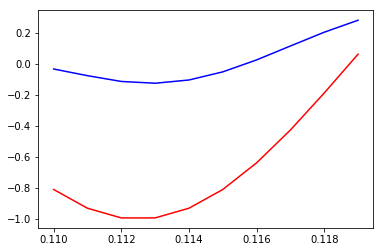

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([0.0008, 0.0942, 0.1910, 0.2692, 0.3212, 0.3453, 0.3401, 0.3035, 0.2328,
        0.1272], grad_fn=<ViewBackward>)


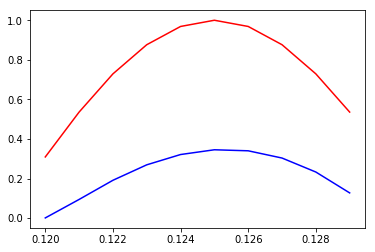

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([-0.0534, -0.1745, -0.3320, -0.4807, -0.5983, -0.6815, -0.7358, -0.7685,
        -0.7844, -0.7857], grad_fn=<ViewBackward>)


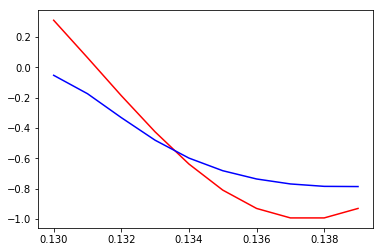

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([0.0011, 0.1020, 0.2502, 0.4135, 0.5600, 0.6749, 0.7596, 0.8211, 0.8662,
        0.8998], grad_fn=<ViewBackward>)


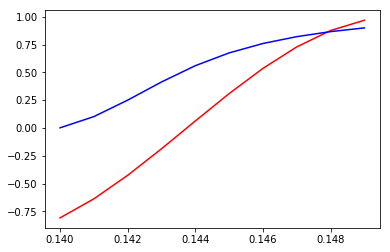

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0253, -0.0311, -0.0871, -0.2116, -0.3982, -0.6063, -0.7857, -0.9132,
        -0.9946, -1.0456], grad_fn=<ViewBackward>)


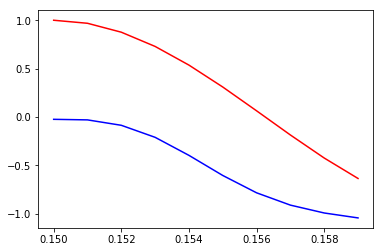

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([-0.0286, -0.1057, -0.2030, -0.2906, -0.3535, -0.3836, -0.3747, -0.3204,
        -0.2133, -0.0503], grad_fn=<ViewBackward>)


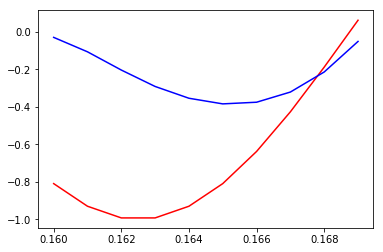

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.0092,  0.1338,  0.3256,  0.5139,  0.6689,  0.7849,  0.8682,  0.9273,
         0.9691,  0.9982], grad_fn=<ViewBackward>)


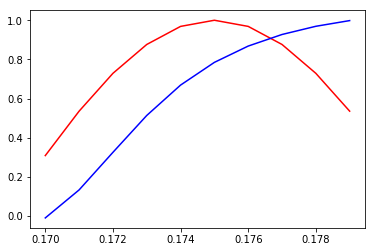

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([-0.0160, -0.1309, -0.3067, -0.4769, -0.6048, -0.6912, -0.7502, -0.7937,
        -0.8281, -0.8562], grad_fn=<ViewBackward>)


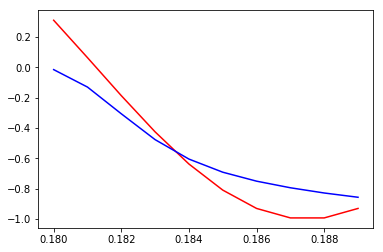

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0153,  0.0890,  0.2688,  0.4672,  0.6250,  0.7297,  0.7958,  0.8396,
         0.8720,  0.8986], grad_fn=<ViewBackward>)


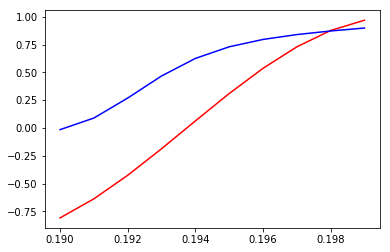

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0155,  0.0125,  0.0166, -0.0286, -0.1360, -0.2877, -0.4331, -0.5380,
        -0.6054, -0.6512], grad_fn=<ViewBackward>)


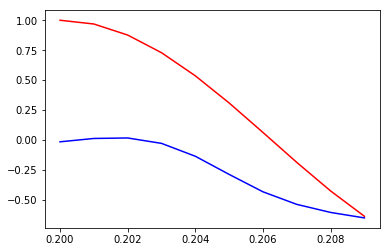

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0085, -0.0399, -0.1176, -0.1984, -0.2680, -0.3164, -0.3349, -0.3128,
        -0.2354, -0.0883], grad_fn=<ViewBackward>)


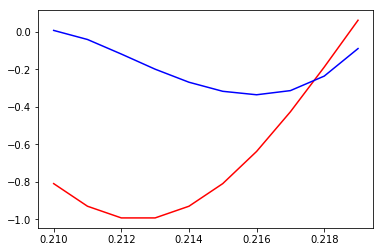

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.0620,  0.0522,  0.2290,  0.3883,  0.4960,  0.5619,  0.6038,  0.6334,
         0.6562,  0.6741], grad_fn=<ViewBackward>)


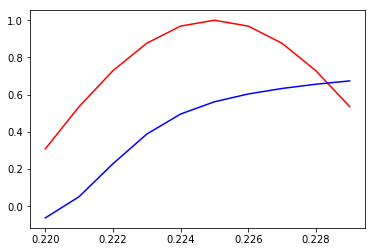

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0378, -0.0189, -0.1419, -0.2738, -0.3770, -0.4510, -0.5091, -0.5610,
        -0.6103, -0.6570], grad_fn=<ViewBackward>)


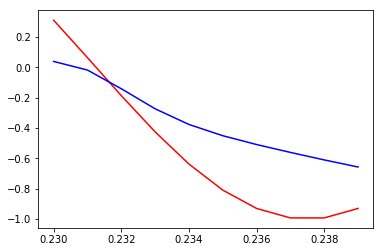

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0502,  0.0325,  0.1992,  0.3665,  0.4763,  0.5372,  0.5723,  0.5966,
         0.6174,  0.6375], grad_fn=<ViewBackward>)


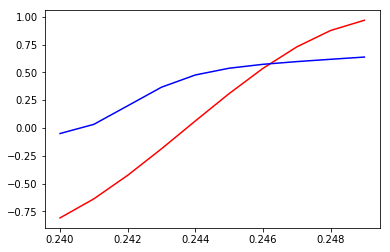

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0191,  0.0338,  0.0903,  0.1245,  0.1171,  0.0513, -0.0772, -0.2381,
        -0.3814, -0.4883], grad_fn=<ViewBackward>)


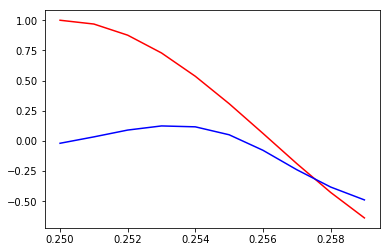

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0278, -0.0143, -0.0912, -0.1708, -0.2285, -0.2374, -0.1634,  0.0156,
         0.2427,  0.4158], grad_fn=<ViewBackward>)


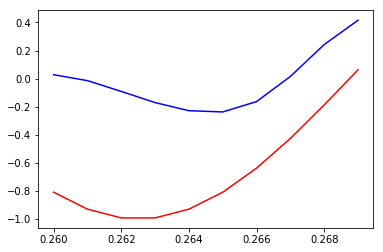

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1031,  0.0285,  0.2538,  0.4491,  0.5758,  0.6524,  0.7012,  0.7354,
         0.7612,  0.7808], grad_fn=<ViewBackward>)


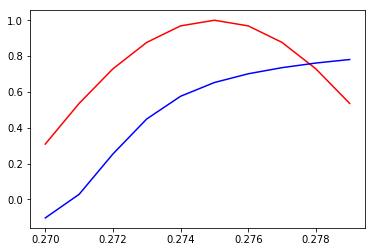

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0551, -0.0361, -0.2351, -0.4400, -0.5991, -0.7177, -0.8120, -0.8915,
        -0.9602, -1.0193], grad_fn=<ViewBackward>)


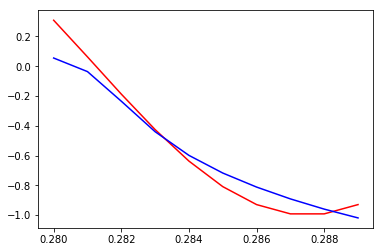

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0867, -0.0057,  0.2026,  0.4169,  0.5623,  0.6512,  0.7080,  0.7492,
         0.7837,  0.8149], grad_fn=<ViewBackward>)


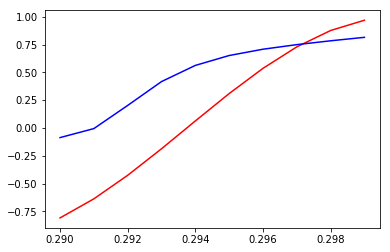

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0386, -0.0042,  0.0059, -0.0714, -0.2611, -0.4792, -0.6433, -0.7521,
        -0.8297, -0.8945], grad_fn=<ViewBackward>)


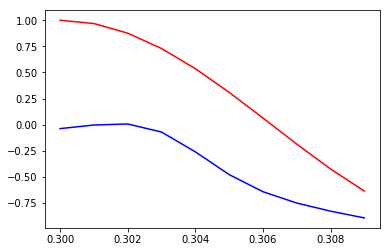

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0397, -0.0626, -0.2799, -0.5486, -0.7926, -0.9726, -1.0914, -1.1666,
        -1.2125, -1.2377], grad_fn=<ViewBackward>)


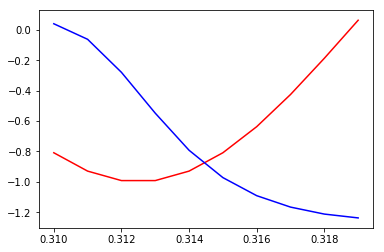

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1573, -0.0589,  0.1724,  0.4052,  0.5869,  0.7159,  0.8030,  0.8620,
         0.9027,  0.9312], grad_fn=<ViewBackward>)


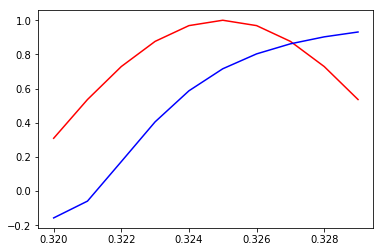

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1051,  0.0307, -0.1390, -0.2704, -0.3591, -0.4319, -0.5009, -0.5679,
        -0.6309, -0.6871], grad_fn=<ViewBackward>)


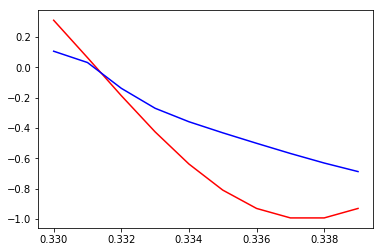

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1077, -0.0759,  0.0819,  0.2692,  0.4118,  0.5139,  0.5928,  0.6611,
         0.7250,  0.7848], grad_fn=<ViewBackward>)


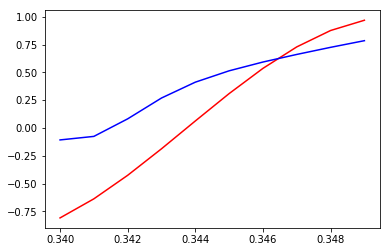

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0236,  0.0202,  0.0404, -0.0214, -0.1436, -0.2282, -0.2701, -0.2969,
        -0.3232, -0.3549], grad_fn=<ViewBackward>)


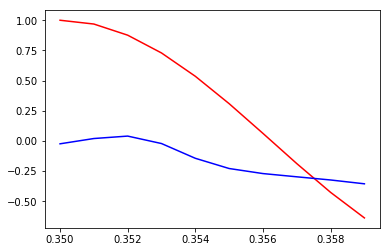

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0783,  0.0054, -0.1641, -0.3296, -0.4379, -0.5046, -0.5478, -0.5760,
        -0.5932, -0.6012], grad_fn=<ViewBackward>)


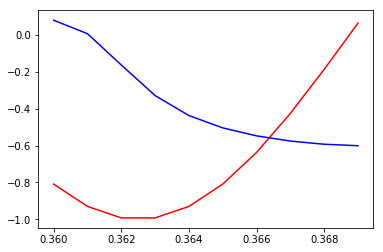

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1651, -0.0979,  0.1048,  0.3406,  0.5535,  0.7198,  0.8364,  0.9149,
         0.9680,  1.0040], grad_fn=<ViewBackward>)


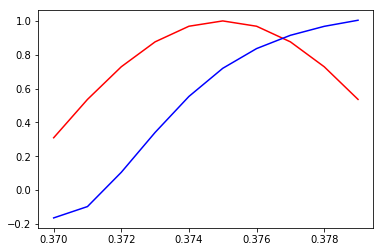

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1421,  0.0950, -0.0384, -0.1264, -0.1833, -0.2324, -0.2794, -0.3241,
        -0.3649, -0.4000], grad_fn=<ViewBackward>)


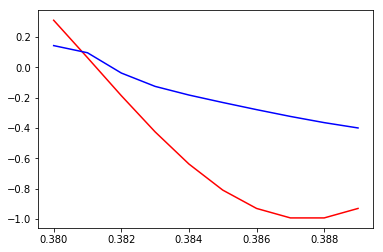

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1058, -0.0785,  0.0752,  0.2697,  0.4356,  0.5660,  0.6675,  0.7498,
         0.8195,  0.8789], grad_fn=<ViewBackward>)


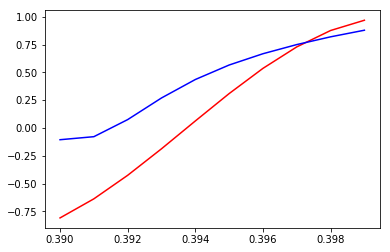

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0167,  0.0351,  0.0636,  0.0025, -0.1297, -0.2221, -0.2678, -0.2957,
        -0.3204, -0.3478], grad_fn=<ViewBackward>)


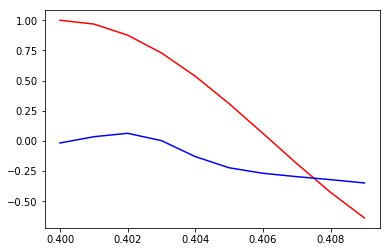

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0847,  0.0022, -0.1851, -0.3556, -0.4526, -0.5038, -0.5332, -0.5506,
        -0.5604, -0.5644], grad_fn=<ViewBackward>)


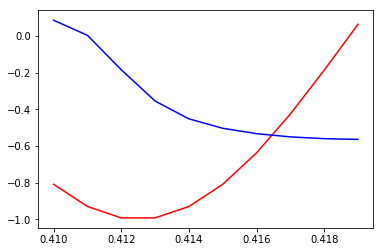

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1590, -0.0703,  0.1527,  0.4073,  0.6257,  0.7767,  0.8702,  0.9290,
         0.9685,  0.9967], grad_fn=<ViewBackward>)


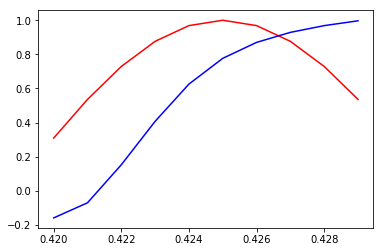

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1361,  0.0515, -0.1511, -0.2979, -0.3823, -0.4375, -0.4790, -0.5122,
        -0.5388, -0.5596], grad_fn=<ViewBackward>)


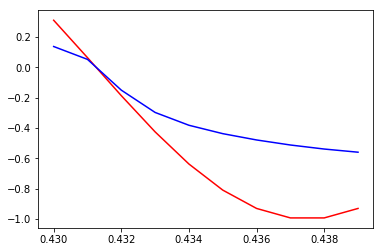

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1043, -0.0504,  0.1286,  0.3274,  0.4900,  0.6085,  0.6903,  0.7493,
         0.7950,  0.8323], grad_fn=<ViewBackward>)


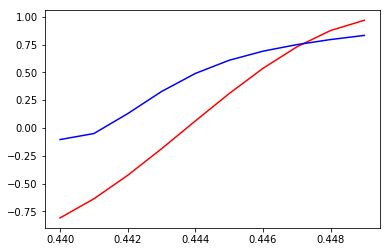

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0208,  0.0397,  0.0839,  0.0323, -0.1551, -0.3497, -0.4617, -0.5184,
        -0.5542, -0.5839], grad_fn=<ViewBackward>)


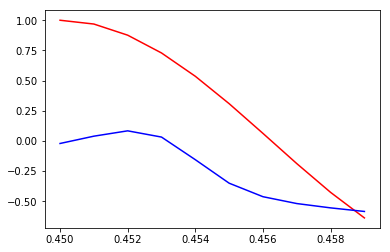

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0803, -0.0169, -0.2410, -0.4686, -0.6052, -0.6701, -0.7020, -0.7190,
        -0.7280, -0.7320], grad_fn=<ViewBackward>)


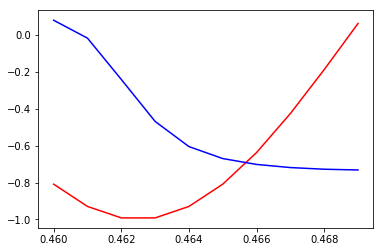

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1581, -0.0463,  0.1776,  0.4023,  0.5683,  0.6649,  0.7173,  0.7493,
         0.7730,  0.7929], grad_fn=<ViewBackward>)


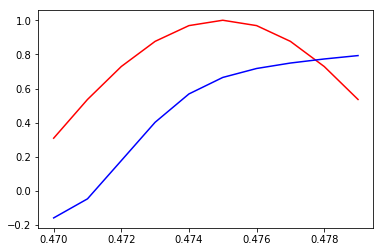

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1402,  0.0434, -0.2162, -0.4317, -0.5497, -0.6127, -0.6520, -0.6790,
        -0.6981, -0.7117], grad_fn=<ViewBackward>)


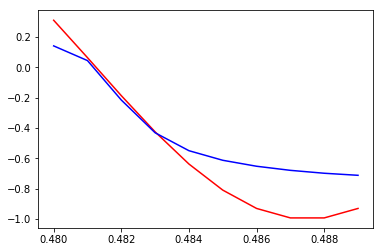

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1049, -0.0271,  0.1611,  0.3408,  0.4770,  0.5691,  0.6296,  0.6734,
         0.7086,  0.7383], grad_fn=<ViewBackward>)


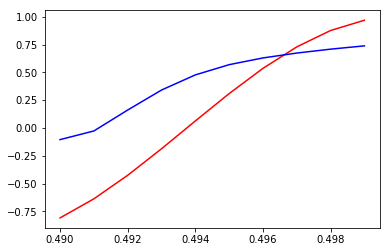

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0169,  0.0749,  0.1959,  0.3052,  0.3639,  0.3194,  0.1001, -0.2360,
        -0.4898, -0.6204], grad_fn=<ViewBackward>)


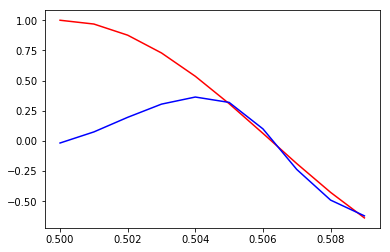

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0926,  0.0071, -0.2109, -0.4681, -0.6465, -0.7326, -0.7712, -0.7899,
        -0.7994, -0.8039], grad_fn=<ViewBackward>)


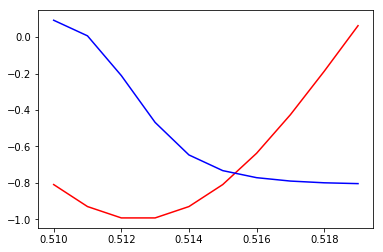

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1533, -0.0122,  0.2337,  0.4823,  0.6684,  0.7743,  0.8292,  0.8608,
         0.8831,  0.9012], grad_fn=<ViewBackward>)


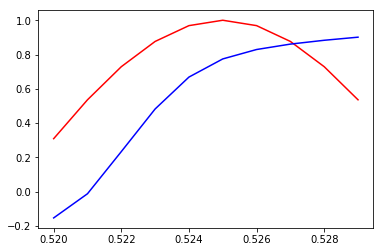

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1570,  0.0582, -0.2478, -0.5188, -0.6571, -0.7186, -0.7506, -0.7692,
        -0.7802, -0.7866], grad_fn=<ViewBackward>)


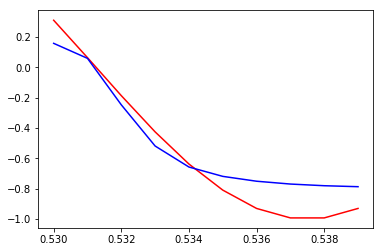

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1013,  0.0076,  0.2159,  0.4075,  0.5591,  0.6646,  0.7353,  0.7866,
         0.8265,  0.8588], grad_fn=<ViewBackward>)


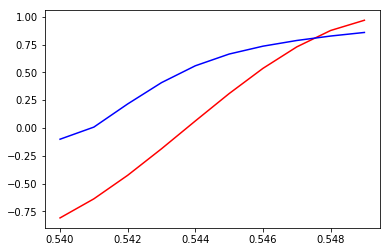

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0137,  0.1140,  0.3220,  0.5859,  0.8360,  0.9783,  1.0191,  1.0116,
         0.9898,  0.9658], grad_fn=<ViewBackward>)


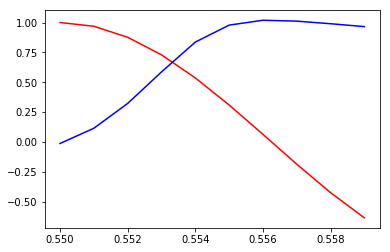

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0918,  0.0242, -0.1533, -0.3831, -0.5802, -0.6916, -0.7404, -0.7609,
        -0.7702, -0.7745], grad_fn=<ViewBackward>)


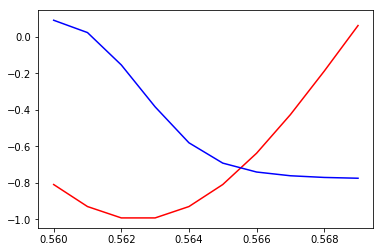

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1779, -0.0810,  0.0695,  0.2075,  0.3018,  0.3488,  0.3712,  0.3849,
         0.3957,  0.4049], grad_fn=<ViewBackward>)


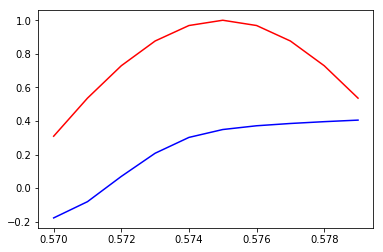

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1422,  0.0754, -0.1891, -0.4657, -0.6128, -0.6697, -0.6948, -0.7071,
        -0.7127, -0.7145], grad_fn=<ViewBackward>)


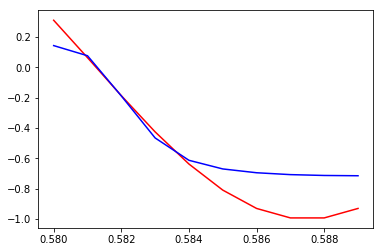

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1335, -0.0800,  0.0106,  0.0672,  0.1049,  0.1314,  0.1550,  0.1805,
         0.2070,  0.2316], grad_fn=<ViewBackward>)


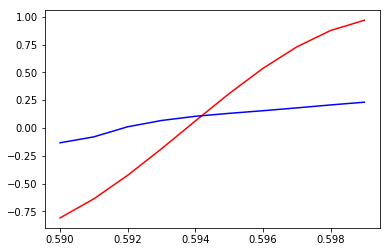

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0412,  0.0621,  0.2266,  0.3846,  0.4374,  0.4045,  0.3644,  0.3404,
         0.3265,  0.3159], grad_fn=<ViewBackward>)


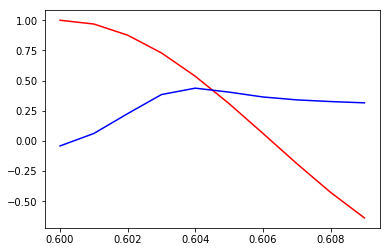

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0655, -0.0001, -0.1501, -0.3489, -0.5360, -0.6498, -0.6965, -0.7124,
        -0.7182, -0.7206], grad_fn=<ViewBackward>)


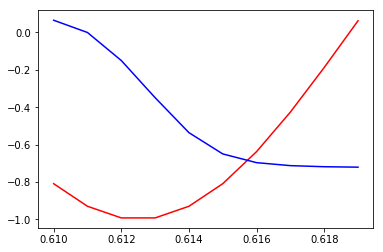

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1707, -0.0737,  0.0573,  0.1592,  0.2050,  0.2175,  0.2215,  0.2240,
         0.2262,  0.2278], grad_fn=<ViewBackward>)


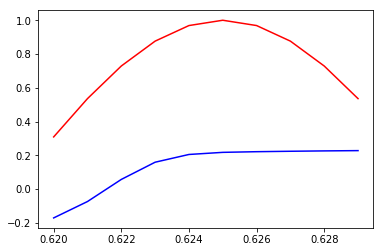

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1155,  0.0182, -0.2678, -0.5454, -0.6714, -0.7099, -0.7232, -0.7276,
        -0.7276, -0.7253], grad_fn=<ViewBackward>)


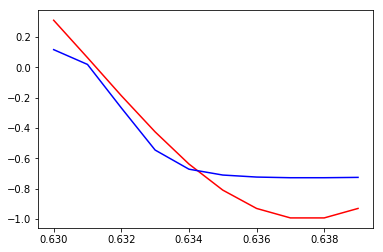

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1119, -0.0158,  0.1202,  0.2146,  0.2660,  0.2906,  0.3065,  0.3209,
         0.3343,  0.3452], grad_fn=<ViewBackward>)


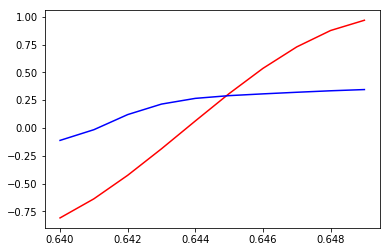

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0317,  0.0851,  0.2702,  0.4436,  0.4970,  0.4758,  0.4566,  0.4483,
         0.4441,  0.4408], grad_fn=<ViewBackward>)


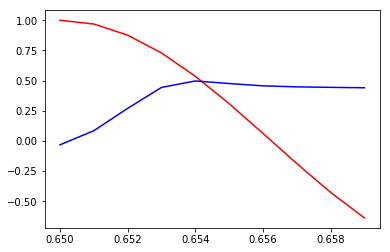

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0572, -0.0370, -0.2372, -0.4881, -0.6705, -0.7445, -0.7648, -0.7702,
        -0.7716, -0.7719], grad_fn=<ViewBackward>)


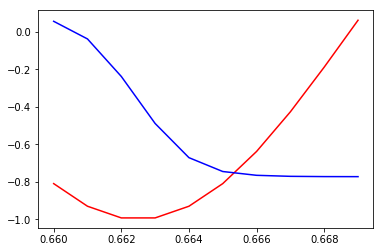

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1251,  0.0464,  0.2634,  0.4083,  0.4542,  0.4615,  0.4616,  0.4608,
         0.4599,  0.4588], grad_fn=<ViewBackward>)


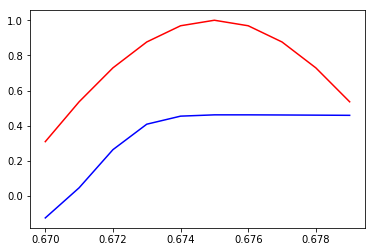

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0961, -0.0753, -0.4243, -0.6846, -0.7721, -0.7918, -0.7952, -0.7926,
        -0.7872, -0.7807], grad_fn=<ViewBackward>)


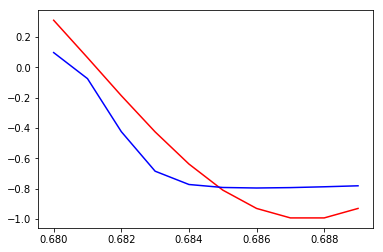

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0785,  0.0848,  0.3084,  0.4683,  0.5400,  0.5657,  0.5774,  0.5857,
         0.5921,  0.5961], grad_fn=<ViewBackward>)


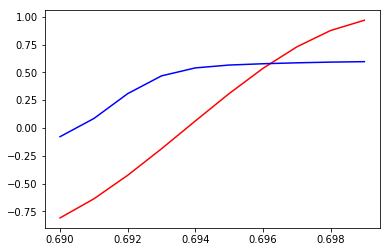

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0187,  0.1120,  0.3225,  0.5396,  0.6345,  0.6363,  0.6289,  0.6266,
         0.6255,  0.6250], grad_fn=<ViewBackward>)


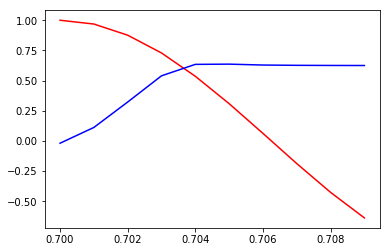

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0529, -0.0750, -0.3325, -0.5943, -0.7168, -0.7442, -0.7475, -0.7463,
        -0.7445, -0.7433], grad_fn=<ViewBackward>)


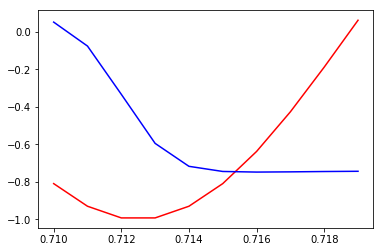

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1046,  0.0986,  0.3573,  0.5123,  0.5495,  0.5497,  0.5447,  0.5401,
         0.5360,  0.5326], grad_fn=<ViewBackward>)


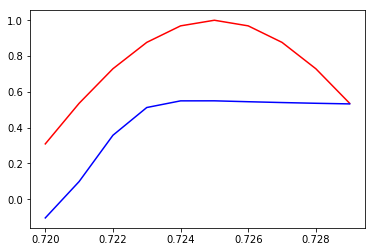

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0861, -0.1173, -0.4662, -0.6778, -0.7318, -0.7398, -0.7374, -0.7306,
        -0.7219, -0.7128], grad_fn=<ViewBackward>)


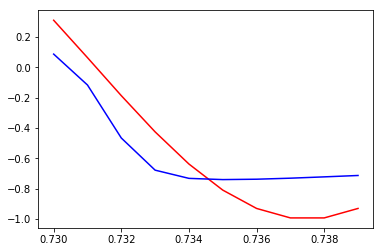

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0767,  0.0913,  0.3228,  0.4833,  0.5458,  0.5641,  0.5704,  0.5737,
         0.5750,  0.5737], grad_fn=<ViewBackward>)


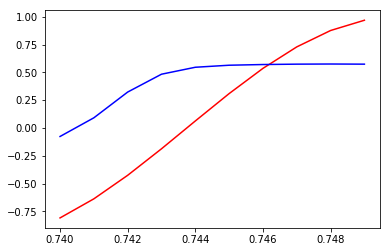

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0236,  0.0973,  0.2897,  0.4866,  0.5658,  0.5534,  0.5388,  0.5344,
         0.5334,  0.5340], grad_fn=<ViewBackward>)


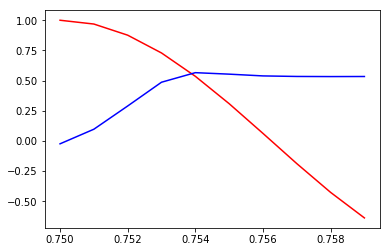

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0474, -0.0931, -0.3603, -0.5805, -0.6490, -0.6525, -0.6478, -0.6428,
        -0.6390, -0.6368], grad_fn=<ViewBackward>)


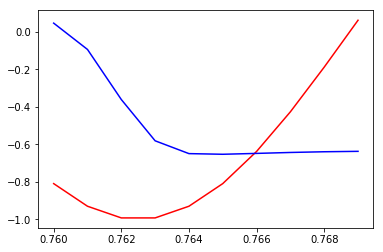

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1155,  0.0667,  0.3007,  0.4291,  0.4473,  0.4366,  0.4246,  0.4149,
         0.4070,  0.4008], grad_fn=<ViewBackward>)


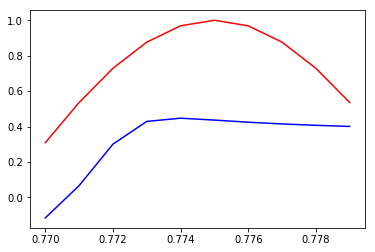

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0832, -0.1171, -0.4437, -0.6243, -0.6625, -0.6654, -0.6598, -0.6505,
        -0.6395, -0.6285], grad_fn=<ViewBackward>)


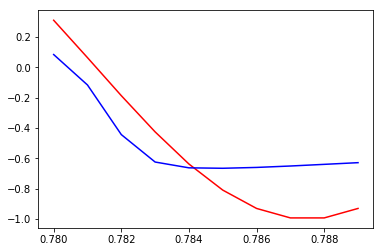

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0902,  0.0597,  0.2626,  0.4002,  0.4504,  0.4634,  0.4665,  0.4666,
         0.4639,  0.4578], grad_fn=<ViewBackward>)


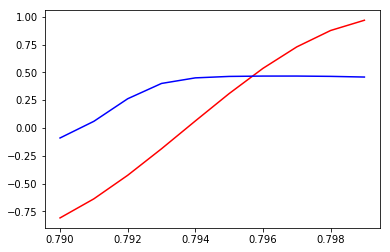

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0335,  0.0808,  0.2606,  0.4322,  0.4771,  0.4407,  0.4165,  0.4092,
         0.4078,  0.4094], grad_fn=<ViewBackward>)


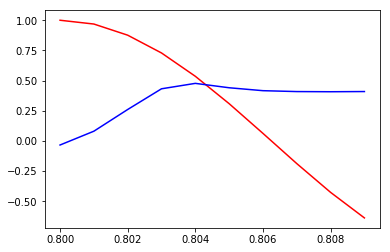

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0428, -0.1098, -0.3898, -0.5941, -0.6427, -0.6384, -0.6300, -0.6225,
        -0.6170, -0.6139], grad_fn=<ViewBackward>)


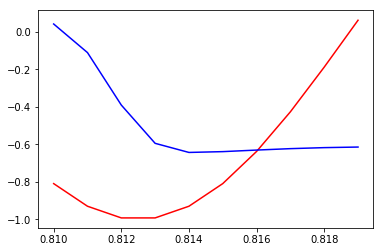

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1249,  0.0517,  0.2722,  0.3927,  0.4056,  0.3891,  0.3709,  0.3556,
         0.3432,  0.3338], grad_fn=<ViewBackward>)


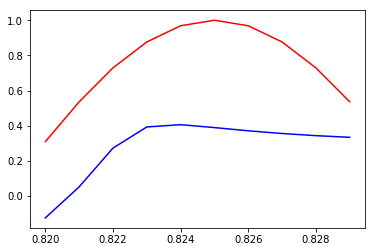

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0799, -0.1419, -0.4887, -0.6755, -0.7160, -0.7188, -0.7106, -0.6973,
        -0.6817, -0.6657], grad_fn=<ViewBackward>)


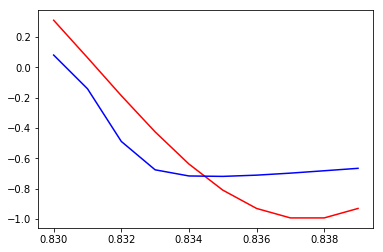

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0956,  0.0629,  0.2631,  0.4023,  0.4590,  0.4766,  0.4817,  0.4818,
         0.4770,  0.4671], grad_fn=<ViewBackward>)


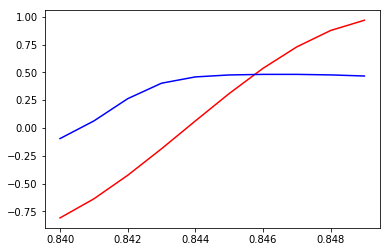

tensor([ 1.0000,  0.9686,  0.8763,  0.7290,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0372,  0.0869,  0.2843,  0.4620,  0.4897,  0.4425,  0.4158,  0.4074,
         0.4061,  0.4089], grad_fn=<ViewBackward>)


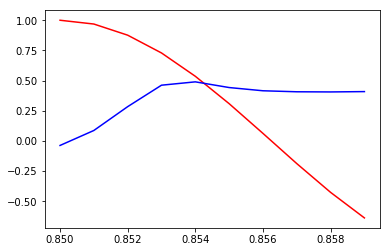

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0417, -0.1348, -0.4524, -0.6686, -0.7157, -0.7099, -0.6984, -0.6876,
        -0.6797, -0.6752], grad_fn=<ViewBackward>)


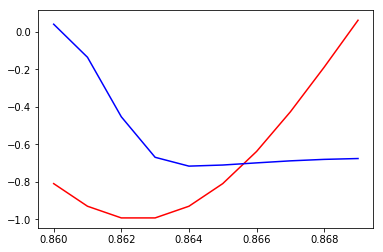

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1248,  0.0669,  0.2976,  0.4391,  0.4647,  0.4498,  0.4266,  0.4038,
         0.3845,  0.3696], grad_fn=<ViewBackward>)


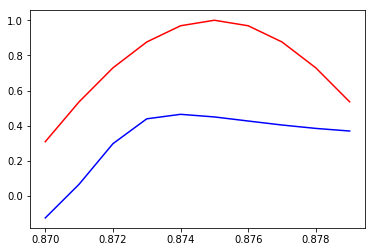

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0802, -0.1762, -0.5570, -0.7617, -0.8135, -0.8201, -0.8103, -0.7921,
        -0.7695, -0.7457], grad_fn=<ViewBackward>)


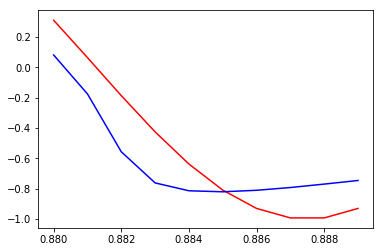

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.0957,  0.0787,  0.2861,  0.4427,  0.5203,  0.5510,  0.5631,  0.5666,
         0.5627,  0.5512], grad_fn=<ViewBackward>)


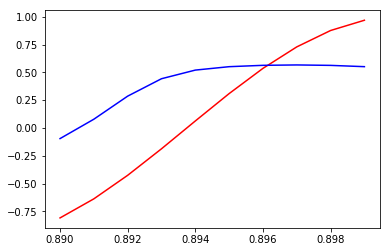

tensor([ 1.0000,  0.9686,  0.8763,  0.7289,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0366,  0.1023,  0.3279,  0.5156,  0.5263,  0.4749,  0.4480,  0.4382,
         0.4365,  0.4408], grad_fn=<ViewBackward>)


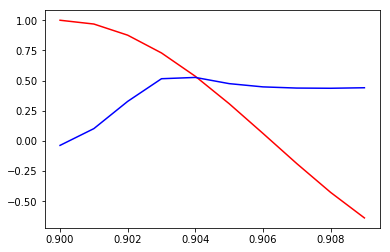

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0477, -0.1424, -0.4790, -0.6904, -0.7297, -0.7208, -0.7055, -0.6910,
        -0.6805, -0.6745], grad_fn=<ViewBackward>)


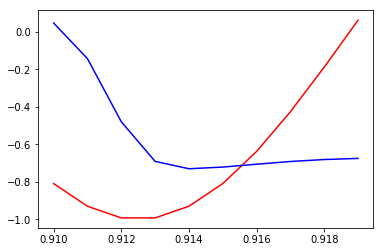

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1282,  0.0618,  0.2917,  0.4633,  0.5129,  0.5058,  0.4805,  0.4494,
         0.4188,  0.3932], grad_fn=<ViewBackward>)


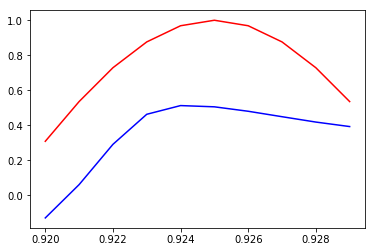

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.0917, -0.1685, -0.5402, -0.7412, -0.7999, -0.8116, -0.8024, -0.7819,
        -0.7546, -0.7250], grad_fn=<ViewBackward>)


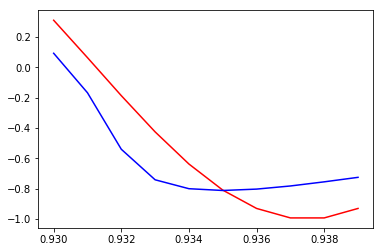

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1009,  0.0679,  0.2620,  0.4264,  0.5294,  0.5806,  0.6054,  0.6165,
         0.6170,  0.6072], grad_fn=<ViewBackward>)


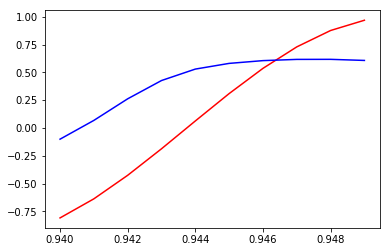

tensor([ 1.0000,  0.9686,  0.8763,  0.7289,  0.5358,  0.3090,  0.0628, -0.1874,
        -0.4258, -0.6374])
tensor([-0.0374,  0.1103,  0.3536,  0.5296,  0.5131,  0.4547,  0.4240,  0.4101,
         0.4066,  0.4122], grad_fn=<ViewBackward>)


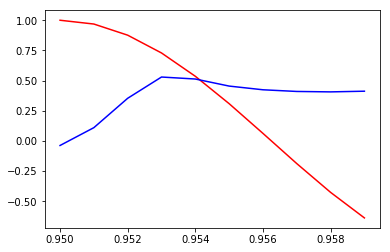

tensor([-0.8090, -0.9298, -0.9921, -0.9921, -0.9298, -0.8090, -0.6374, -0.4258,
        -0.1874,  0.0628])
tensor([ 0.0576, -0.1303, -0.4582, -0.6452, -0.6696, -0.6557, -0.6364, -0.6187,
        -0.6059, -0.5986], grad_fn=<ViewBackward>)


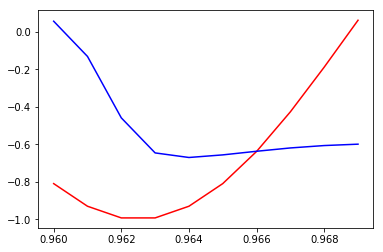

tensor([0.3090, 0.5358, 0.7290, 0.8763, 0.9686, 1.0000, 0.9686, 0.8763, 0.7290,
        0.5358])
tensor([-0.1390,  0.0309,  0.2350,  0.4318,  0.5199,  0.5291,  0.5062,  0.4686,
         0.4230,  0.3762], grad_fn=<ViewBackward>)


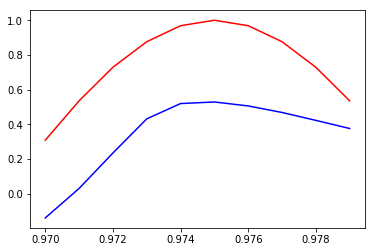

tensor([ 0.3090,  0.0628, -0.1874, -0.4258, -0.6374, -0.8090, -0.9298, -0.9921,
        -0.9921, -0.9298])
tensor([ 0.1071, -0.1390, -0.4797, -0.6738, -0.7428, -0.7635, -0.7589, -0.7390,
        -0.7091, -0.6744], grad_fn=<ViewBackward>)


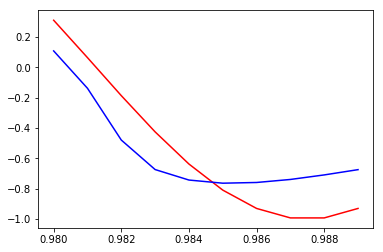

tensor([-0.8090, -0.6374, -0.4258, -0.1874,  0.0628,  0.3090,  0.5358,  0.7290,
         0.8763,  0.9686])
tensor([-0.1104,  0.0445,  0.2093,  0.3598,  0.4818,  0.5640,  0.6153,  0.6451,
         0.6577,  0.6551], grad_fn=<ViewBackward>)


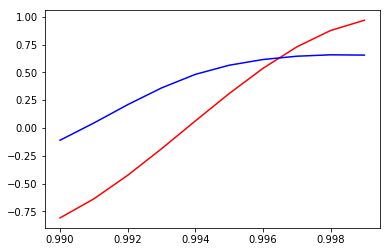

In [24]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

model = BasicLSTM(INPUT_SIZE, 32, INPUT_SIZE, 1, 1)
loss_fn = torch.nn.MSELoss(size_average=False)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

plt.figure(1, figsize=(12, 5))
plt.ion()

hist = np.zeros(100)
batch_first = True

len_seq = 10
n_samples = 100
step = 0.001
a = np.arange(0,len_seq*n_samples*step, step, dtype=np.float32)
a = np.reshape(a,(n_samples,len_seq))

sin_seq = np.sin(a*2*np.pi*40)
cos_seq = np.cos(a*2*np.pi*40)

for t in range(0,100): 
    model.zero_grad()
    
    x_np = np.array(sin_seq[t,:])
    y_np = np.array(cos_seq[t,:])
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np)
    
    lengths_np = np.ones(1) * 10
    lengths = torch.from_numpy(lengths_np)
    
    y_pred = model(x, lengths_np.tolist(), batch_first)
    print(y)
    print(y_pred)
    loss = loss_fn(y_pred, y)
    hist[t] = loss.item()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    batch_first = False
    
    step_y = np.array(a[t,:])
    plt.plot(step_y, y_np.flatten(), 'r-')
    plt.plot(step_y, y_pred.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)
    
plt.ioff()
plt.show()

# STEP 9 #
Στα επόμενα βήματα, θα μελετήσουμε ένα μεγαλύτερο σετ δεδομένων, το Free Spoken Digit Dataset (FSDD), το οποίο περιέχεται στον φάκελο recordings. Χρησιμοποιούμε την έτοιμη συνάρτηση parser.py, από το βοηθητικό υλικό που μας δόθηκε, στην οποία γίνεται το διάβασμα των νέων δεδομένων, η εξαγωγή των MFCCs, η κανονικοποίηση και ο χωρισμός τους σε train και test set. Η συνάρτηση αυτή, που ορίζεται στη συνέχεια, δέχεται ως όριμα το path του φακέλου recordings και επιστρέφει τα X_train, X_test, τα labels y_train, y_test και τους ομιλητές που αντιστοιχούν σε κάθε δείγμα στα δύο sets.

Αφού δημιουργήσουμε τα δύο sets με την κλήση της συνάρτησης, χωρίζουμε τα train δεδομένα σε training και validation set με ποσοστό 80%-20% και με τέτοιο τρόπο τα δεδομένα ώστε να διατηρηθεί ίδιος ο αριθμός των διαφορετικών ψηφίων σε κάθε set (stratified split). Χρησιμοποιούμε τη συνάρτηση train_test_split του sklearn με την παράμετρο stratify=y_train. Στη συνέχεια εκτυπώνουμε το πλήθος των δειγμάτων που περιέχονται σε καθένα από τα X_train, X_val, X_test καθώς και τις διαστάσεις του πρώτου δείγματος σε κάθε set. Παρατηρούμε ότι κάθε δείγμα έχει 6 χαρακτηριστικά (στήλες) που προκύπτουν από την εξαγωγή των mfccs και διαφορετικό πλήθος παραθύρων (γραμμές).

In [3]:
def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    fnames = [f.split('/')[1].split('.')[0].split('_') for f in files]
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [4]:
path = 'recordings'
X_train, X_test, y_train, y_test, spk_train, spk_test = parser(path)

Total wavs: 1500


In [5]:
print("X_train has samples ", np.shape(X_train),", with features ", np.shape(X_train[0]))
print("X_test has samples ", np.shape(X_test), ", with features ", np.shape(X_test[0]))

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state = 1)

print("After splitting to validation set X_train has samples ", np.shape(X_tr), ", with features ", np.shape(X_tr[0]))
print("X_val has samples ", np.shape(X_val), ", with features ", np.shape(X_val[0]))

X_train has samples  (1350,) , with features  (27, 6)
X_test has samples  (150,) , with features  (18, 6)
After splitting to validation set X_train has samples  (1080,) , with features  (24, 6)
X_val has samples  (270,) , with features  (16, 6)


# STEP 10 #
Στη συνέχεια, θα κάνουμε αναγνώριση ψηφίων με GMM-HMM (Gaussian Mixture Models – Hidden Markov Models). Χρησιμοποιούμε τη βιβλιοθήκη pomegranate της Python, την οποία εγκαθιστούμε στη συνέχεια. Αρχικά, θα αρχικοποιήσουμε ένα GMM-HMM μοντέλο για κάθε ψηφίο. Χρησιμοποιούμε και επεκτείνουμε την συνάρτηση hmm.py του βοηθητικού υλικού, την οποία και δηλώνουμε στη συνέχεια ως init_GMM_HMM_model. Το μοντέλο που υλοποιούμε στο εσωτερικό αυτής είναι της μορφής left-right με transition matrix της μορφής [[0.5,0.5,0,...,0],[0,0.5,0.5,0,...,0],...,[0,0,...,0,0.5,0.5],[0,0,,...,1]] (διαστάσεις (n_states,n_states)), starting probability matrix [1,0,...,0] (διαστάσεις (1,n_states)), ending probability matrix [0,...,0,1] (διαστάσεις (1,n_states)). Τους πίνακες αυτούς δίνουμε ως είσοδο στην έτοιμη συνάρτηση του pomegranate HiddenMarkovModel, μαζί με μια λίστα των κατανομών πιθανότητας για τις HMM states, οι οποίες υπολογίζονται με ένα μίγμα Γκαουσιανών κατανομών (GMM).

Για τον υπολογισμό του GMM, δίνεται ως είσοδος στην init_GMM_HMM_model, εκτός από τα n_states (καταστάσεις HMM), n_mixtures (γκαουσιανές κατανομές), ένας numpy πίνακας ο οποίος περιέχει όλα τα δείγματα - χαρακτηριστικά για ένα ψηφίο. Πριν την κλίση της συνάρτησης για κάθε ψηφίο, δημιουργούμε έναν numpy πίνακα χαρακτηριστικών για κάθε ψηφίο και τους αποθηκεύουμε ως στοιχεία της λίστας allsamples_d_np. Αρχικοποιούμε τα μοντέλα και για τα δέκα ψηφία, καλώντας την init_GMM_HMM_model με n_states=2, n_mixtures=2 και τον αντίστοιχο numpy πίνακα που αντιστοιχεί στο ψηφίο. Η αρχικοποίηση αυτή γίνεται εποπτικά αρχικά, με τυχαίες τιμές για τα n_states, n_mixtures για να επιβεβαιώσουμε τη λειτουργία της συνάρτησης που δημιουργεί τα μοντέλα. Στη συνέχεια, θα δοθούν τιμές στις παραμέτρους μετά από δοκιμές για να βελτιώσουμε την απόδοση των μοντέλων.

In [28]:
!pip install --user pomegranate --upgrade

Requirement already up-to-date: pomegranate in /home/nbuser/.local/lib/python3.6/site-packages (0.10.0)


In [29]:
from pomegranate import *
def init_GMM_HMM_model(X,n_states,n_mixtures):
    if n_mixtures == 1:
        gmm = False
    else:
        gmm = True # whether to use GMM or plain Gaussian

    dists = [] # list of probability distributions for the HMM states
    for i in range(n_states):
        if gmm:
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, X)
        else:
            a = MultivariateGaussianDistribution.from_samples(X)
        dists.append(a)

    trans_mat = np.zeros((n_states,n_states)) # your transition matrix
    for i in range(n_states):
        for j in range(n_states):
            if j>=i and j<=i+1:
                if j==i and j==n_states-1:
                    trans_mat[i][j]=1
                else:
                    trans_mat[i][j]=0.5
    
    starts = [0.0]*n_states # your starting probability matrix
    starts[0]=1
    
    ends = [0.0]*n_states # your ending probability matrix
    ends[n_states-1]=1
    
    # Define the GMM-HMM
    model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, state_names=['s{}'.format(i) for i in range(n_states)]) 
    return model

In [30]:
allsamples_d_list = [None]*10
allsamples_d_np = [None]*10

for label in np.unique(y_tr):
    indices = [i for i, x in enumerate(y_tr) if x == label]
    tmp = []

    for i in indices:
        tmp.append(X_tr[i])

    allsamples_d_list[label] = np.array(tmp)
    allsamples_d_np[label] = np.concatenate(allsamples_d_list[label], axis=0)

model_init = [None]*10
for label in np.unique(y_tr):
    model_init[label] = init_GMM_HMM_model(allsamples_d_np[label], 2, 2)

# STEP 11 #
Στη φάση αυτή εκπαιδεύονται τα 10 μοντέλα, που αρχικοποιήσαμε παραπάνω, με χρήση του αλγορίθμου Expectation Maximization. Ο αλγόριθμος εφαρμόζεται για καθορισμένο πλήθος επαναλήψεων Niter ή εως να υπάρξει σύγκλιση. Παίρνουμε εδώ την τιμή Niter=5, απλά για να ελέγξουμε πώς λειτουργεί ο αλγόριθμος ενώ στο επόμενο βήμα θα κάνουμε δοκιμές για τις τελικές παραμέτρους που θα χρησιμοποιήσουμε για την αναγνώριση. Για την εκπαίδευση κάθε μοντέλου δίνεται στη μέθοδο fit μια λίστα που περιλαμβάνει όλα τα δείγματα - χαρακτηριστικά για ένα ψηφίο, την οποία υπολογίσαμε στο βήμα 10 και την αποθηκεύσαμε στη allsamples_d_list μαζί με όλες τις λίστες για τα 10 ψηφία.

In [31]:
models = [None]*10
for label in np.unique(y_tr):
    models[label]=model_init[label].fit(allsamples_d_list[label], max_iterations=5)

# STEP 12 #
Δημιουργούμε τη συνάρτηση predict_score_HMM, η οποία υπολογίζει για καθένα από τα 10 μοντέλα GMM-HMM, που δημιουργούμε για κάθε ψηφίο, και για κάθε εκφώνηση, η οποία ανήκει στο
σύνολο των δεδομένων για αναγνώριση, το λογάριθμο της πιθανοφάνειας (log likelihood) με τον αλγόριθμο viterbi. Από τα log που υπολογίζονται για κάθε δείγμα και κάθε μοντέλο, επιλέγεται το maximum το οποίο αντιστοιχεί και στην κλάση που ταξινομείται το δείγμα. Η συνάρτηση λοιπόν υπολογίζει όλες τις προβλέψεις για το σύνολο δειγμάτων που της δίνεται ως όρισμα καθώς και το ποσοστό επιτυχίας της ταξινόμησης και τα επιστρέφει.

Αρχικά, θα πραγματοποιήσουμε την αναγνώριση μόνο στο validation set, μεταβάλλοντας τις παραμέτρους εκπαίδευσης του μοντέλου ώστε να καταλήξουμε στο καλύτερο δυνατό αποτέλεσμα. Δημιουργούμε τρία loops, στα οποία παίρνουμε τιμές για το n_state από 1-4, για το n_mixtures από 1-5 και για το Niter από 1-5 και για κάθε συνδυασμό αρχικοποιούμε και εκπαιδεύουμε τα 10 μοντέλα GMM-HMM και υπολογίζουμε τα πσοοστά επιτυχίας στο validation set μέσω της predict_score_HMM. Τέλος, εκτυπώνουμε τις παραμέτρους που οδήγησαν στο μεγαλύτερο ποσσοτό στο validation set. Η διαδικασία αυτή επειδή είναι αρκετά χρονοβόρα, έχει τοποθετηθεί σε σχόλια, ώστε να τρέχει μόνο στην περίπτωση που επιθυμούμε να δούμε τα αποτελέσματα της και τα αφαιρέσουμε.

In [32]:
def predict_score_HMM(X,y):
    y_predict = [None]*len(y)
    for i in range(0,len(y)):
        logp_sample = [None]*10
        for label in np.unique(y):
            logp, _ = models[label].viterbi(X[i])
            logp_sample[label] = logp
        y_predict[i] = np.argmax(logp_sample)

    hits_clas = 0
    for i in range(0,len(y)):
        hits_clas = hits_clas + (y_predict[i] == y[i])

    srate = hits_clas / len(y)
    return y_predict,srate

In [33]:
'''
max_rate=0.0
max_state=0
max_mix=0
max_Ni=0
for state in range(1,5):
        for mixture in range(1,6):
            for Ni in range(1,6):
                for label in np.unique(y_tr):
                    model = init_GMM_HMM_model(allsamples_d_np[label], state, mixture)
                    models[label]=model.fit(allsamples_d_list[label], max_iterations=Ni) 
                    
                y_predict,srate = predict_score_HMM(X_val,y_val)
                
                if srate>max_rate:
                    max_rate = srate
                    max_state = state
                    max_mix = mixture
                    max_Ni = Ni
                print('State ',state,', Mix ',mixture, ', Max_it ',Ni, ', rate',srate)
print('Best params:','State ',max_state,', Mix ',max_mix, ', Max_it ',max_Ni, ', rate',max_rate) '''

"\nmax_rate=0.0\nmax_state=0\nmax_mix=0\nmax_Ni=0\nfor state in range(1,5):\n        for mixture in range(1,6):\n            for Ni in range(1,6):\n                for label in np.unique(y_tr):\n                    model = init_GMM_HMM_model(allsamples_d_np[label], state, mixture)\n                    models[label]=model.fit(allsamples_d_list[label], max_iterations=Ni) \n                    \n                y_predict,srate = predict_score_HMM(X_val,y_val)\n                \n                if srate>max_rate:\n                    max_rate = srate\n                    max_state = state\n                    max_mix = mixture\n                    max_Ni = Ni\n                print('State ',state,', Mix ',mixture, ', Max_it ',Ni, ', rate',srate)\nprint('Best params:','State ',max_state,', Mix ',max_mix, ', Max_it ',max_Ni, ', rate',max_rate) "

Οι βέλτιστες παράμετροι που βρήκαμε στο validation set είναι για n_state=4, n_mixtures=5, Niter=2. Για αυτές τις τιμές εκπαιδεύουμε τα 10 μοντέλα, πραγματοποιούμε τις προβλέψεις στο validation set και τυπώνουμε το ποσοστό επιτυχίας ξεχωριστά.

In [34]:
state = 4
mixture = 5
Ni = 2
for label in np.unique(y_tr):
    model = init_GMM_HMM_model(allsamples_d_np[label], state, mixture)
    models[label]=model.fit(allsamples_d_list[label], max_iterations=Ni) 

y_predict_val,srate = predict_score_HMM(X_val,y_val)
print('Best params calculated on validation set are:','State ',state,', Mix ',mixture, ', Max_it ',Ni, ', rate',srate*100,'%')

Best params calculated on validation set are: State  4 , Mix  5 , Max_it  2 , rate 97.77777777777777 %


Επίσης για τις βέλτιστες παραμέτρους που υπολογίσαμε εκπαιδεύουμε τα 10 μοντέλα και πραγματοποιούμε τις προβλέψεις στο test set και τυπώνουμε το ποσοστό επιτυχίας. Παρατηρούμε ότι το ποσοστό στο test set είναι αρκετά υψηλό και λίγο μικρότερο από το αντίστοιχο στο validation set, όπως αναμενόταν (μιας και στο validation set έχουμε κάνει το tuning). Επίσης,  για κάθε μοντέλο (ψηφίο) υπολογίζουμε το πλήθος των αποτελεσμάτων όπως αυτά κατανέμονται στις διαφορετικές κατηγορίες ψηφίων.

In [35]:
y_predict_test,srate = predict_score_HMM(X_test,y_test)
print('Success rate on test set is ',srate*100,'%',', with parameters: State ',state,', Mix ',mixture, ', Max_it ',Ni)

hits_per_class = [0]*10
for i in range(0,len(y_predict_test)):
    hits_per_class[y_predict_test[i]]=hits_per_class[y_predict_test[i]]+1

print('From the ',len(y_predict_test), ' samples we have ', hits_per_class, ' hits per class, first element is the hit for class 0, etc')

Success rate on test set is  96.66666666666667 % , with parameters: State  4 , Mix  5 , Max_it  2
From the  150  samples we have  [15, 16, 14, 17, 14, 16, 15, 15, 13, 15]  hits per class, first element is the hit for class 0, etc


Γιατί πραγματοποιούμε την παραπάνω διαδικασία αρχικά στο validation set και μετά με τις βέλτιστες παραμέτρους στο test set;

Δεδομένης της επιλογής των τιμών υπερπαραμέτρων, χρησιμοποιείται το train set για την εκπαίδευση του μοντέλου. Η ρύθμιση των τιμών των υπερπαραμέτρων γίνεται με τη βοήθεια του validation set, το οποίο χρησιμοποιείται για να αξιολογήσουμε την απόδοση του μοντέλου μας για διαφορετικούς συνδυασμούς τιμών υπερπαραμέτρων και για να διατηρήσουμε το καλύτερο εκπαιδευμένο μοντέλο. Η διαδικασία αυτή είναι απαραίτητη για να διασφαλίσουμε μια καλή απόδοση στην διαδικασία της αναγνώρισης, δεδομένου ότι ενδέχεται η διαφοροποίηση των τιμών των υπερπαραμέτρων να επηρεάζει αρκετά την επίδοση του μοντέλου και αν αυτές παρθούν τυχαία τα αποτελέσματα να μην είναι ικανοποιητικά. Ωστόσο, το validation set δεν μπορεί να χρησιμοποιηθεί για τη σύγκριση της επίδοσης του μοντέλου μας με την επίδοση ενός άλλου μοντέλου. Για το σκοπό αυτό, χρησιμοποιείται το test set, το οποίο αξιολογεί το μοντέλο με αμερόληπτο τρόπο, καθώς αποτελείται από δεδομένα που δεν χρησιμοποιήθηκαν σε κανένα μέρος της διαδικασίας εκπαίδευσης / επιλογής υπερπαραμέτρων.

# STEP 13 #
Στη συνέχεια, σχηματίζουμε 2 πίνακες οι οποίοι θα περιέχουν τα αποτελέσματα της διαδικασίας του βήματος 12 για το validation και το test set. Πιο συγκεκριμένα, φτιάχνουμε έναν Confusion Matrix πίνακα, ο οποίος είναι της μορφής 10x10, και στις γραμμές του περιέχει τα προς ταξινόμηση ψηφία, ενώ στις στήλες του τις κλάσεις στις οποίες αυτά ταξινομήθηκαν. Αυτό γίνεται με τη χρήση της έτοιμης συνάρτησης confusion_matrix του sklearn.metrics, η οποία παίρνει ως όρισμα της προβλέψεις του μοντέλου, τις πραγματικές ετικέτες κάθε δείγματος καθώς και τις κλάσεις. Επίσης, χρησιμοποιούμε την συνάρτηση του βοηθητικού υλικού plot_confusion_matrix για να οπτικοποιήσουμε τον Confusion Matrix. Στην κύρια διαγώνιο βρίσκονται οι εύστοχες προβλέψεις για κάθε set, όπως αυτές παρουσιάστηκαν και στο προηγούμενο βήμα.

In [2]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  1]
 [ 0  0  1 26  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  1  0  0 25  0  1  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  1  0  0  0  0 25  1]
 [ 0  0  0  0  0  0  0  0  0 27]]


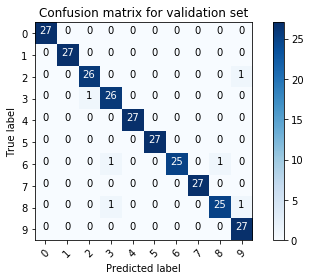

In [37]:
#for val set
classes = np.unique(y_val)
cm = confusion_matrix(y_val, y_predict_val,classes)
fig = plt.figure()
title='Confusion matrix for validation set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

Confusion matrix, without normalization
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  1  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  1 14  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  2  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


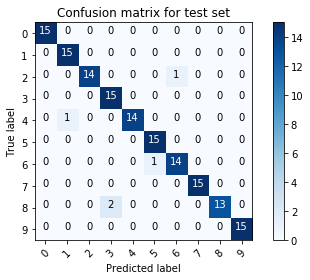

In [38]:
#for test set
classes = np.unique(y_test)
cm = confusion_matrix(y_test, y_predict_test,classes)
fig = plt.figure()
title='Confusion matrix for test set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

# STEP 14 #
Στο βήμα αυτό εκπαιδεύσαμε ένα Αναδρομικό Νευρωνικό Δίκτυο πάνω στο training set, χρησιμοποιώντας το validation set για τη ρύθμιση των υπερπαραμέτρων. Αρχικά, δημουργούμε ένα **απλό LSTM**, μονής κατεύθυνσης. Συγκεκριμένα, χρησιμοποιήσαμε το βοηθητικό κώδικα (lstm.py) για την υλοποίηση του δικτύου και δημιουργήσαμε την κλάση BasicLSTM η οποία βασίστηκε στον δοθέντα κώδικα. Συμπληρώθηκε η μέθοδος forward, στην οποία περνάμε όλο το batch από το nn.LSTM ενώ στη συνέχεια κρατάμε μόνο το τελευταίο output (μέσω της μεθόδου last_timestep της κλάσης) για να το περάσουμε μέσα από το υπόλοιπο δίκτυο. Η κλάση FrameLevelDataset με τη μέθοδο zero_pad_and_stack, χρησιμοποιήθηκαν για να φέρνουν τις ακολουθίες των δειγμάτων ενός batch στο ίδιο μέγεθος, κάνοντας zero padding. Επίσης, χρησιμοποιήσαμε το **pack_padded_sequence στην εκπαίδευση του μοντέλου** και για το σκοπό αυτό ταξινομούμε τις ακολουθίες κάθε batch κατά φθίνουσα σειρά μήκους(κρατώντας και τα αντίστοιχα labels όταν γίνει η ταξινόμηση) στην zero_pad_and_stack.

Επιπλέον, δημιουργήσαμε δύο συναρτήσεις εκτός κλάσεων, τις get_pred, eval_pred. Η πρώτη παίρνει τα δείγματα με τις ακολουθίες ενός batch (σε μορφή λίστας από numpy arrays) και τις αντίστοιχες ετικέτες τους και καλεί την zero_pad_and_stack (η οποία επιστρέφει το επεξεργασμένο batch σε μορφή 3D numpy array, τα μήκη των ακολουθιών στο batch και τις ετικέτες τους μετά την ταξινόμηση). Μετατρέπει το batch που επιστρέφεται μαζί με τα lengths σε μορφή torch tensor και καλεί το BasicLSTM. Επιστρέφει την έξοδο του νευρωνικού και τις πραγατικές ετικέτες κάθε δείγματος. Η eval_pred δημιουργήθηκε για να παράγει από την έξοδο του νευρωνικού τις προβλέψεις για τις ετικέτες κάθε δείγματος. Για το σκοπό αυτό καλεί την get_pred και στο output του νευρωνικού (που είναι της μορφής μέγεθος batch επί 10 κλάσεις) εφαρμόζει την np.argmax ανά γραμμή (δηλαδή δείγμα) για να επιστραφεί η ετικέτα με την μεγαλύτερη τιμή. Ειστρέφονται οι προβλέψεις για όλα τα δείγματα, οι παραγματικές τιμές ετικτών καθώς και η έξοδος του νευρωνικού.

Στο κύριο cell που περιλαμβάνει το train loop ορίζουμε αρχικά το μοντέλο μας με **input_dim=6 (πλήθος features), output_dim=10 (διαφορετικές ετικέτες), bidirectional=False**. Χρησιμοποιούμε για loss function το **nn.CrossEntropyLoss** και ως optimizer το **torch.optim.SGD**. Για το πλήθος των εποχών που έχουμε ορίσει, χωρίζουμε σε κάθε μια από αυτές το σύνολο του X_train σε batches (ανάλογα το μέγεθος του batch size) καλούμε την get_pred και βρικουμε το loss ανάμεσα στο output και τις πραγματικές ετικέτες των δειγμάτων του batch. Κάνουμε back propagation στο λάθος με την loss.backward(). Για την ανανέωση των βαρών του νευρωνικού χρησιμοποιούμε την optimizer.step(). Yπολογίζουμε το training loss σε κάθε εποχή, αθροίζοντας τα επιμέρους loss κάθε batch και διαιρώντας με το πλήθος τους και το τυπώνουμε. Σε κάθε εποχή, αφού γίνει η εκπαίδευση μέσω των batches του training set γίνεται αποτίμηση του μοντέλου στο validation set καλώντας την eval_pred και την accuracy_score για τις προβλέψεις των δειγμάτων. Eπιπλέον υπολογίζεται και τυπώνεται το loss στο validation set.

**Βελτιώσεις LSTM**
- Προσθέσαμε στο νευρωνικό **dropout και L2 regularization** ως εξής: θέτοντας την παράμετρο dropout στο nn.LSTM που ορίζεται στην μέθοδο init της κλάσης BasicLSTM και θέτοντας την παράμετρο weight_decay στον optimizer αντίστοιχα.<br>
Το dropout λειτουργεί με τον εξής τρόπο (σύμφωνα με το paper "Improving neural networks by preventing co-adaptation of feature detectors": κάθε κόμβος του νευρωνικού (εκτός από αυτούς που βρίσκονται στο τελευταίο layer) μπορεί να απενεργοποιηθεί σε κάθε χρονικό βήμα με πιθανότητα p, έτσι ώστε να μην αλληλεπιδρα με το υπόλοιπο δίκτυο (τα βάρη δεν μπορούν να ενημερωθούν ούτε να επηρεάσουν την εκμάθηση των άλλων κόμβων του δικτύου). Χάρη σε αυτό, τα βάρη των κόμβων που απενεργοποιήθηκαν αποκτούν μικρότερη ευαισθησία στα βάρη των άλλων κόμβων με αποτέλεσμα να μειώνεται το overfitting και και γενικά οι νευρώνες να μαθαίνουν να αναγνωρίζουν features τα οποία είναι πιο χρήσιμα στην τελική αναγνώριση. <br>
To L2 regularization πρακτικά προσθέτει στην loss function που χρησιμοποιούμε έναν όρο, που ονομάζεται regularization term. Λόγω της προσθήκης αυτού του όρου, οι τιμές των πινάκων βάρους μειώνονται. Αυτό γίνεται, γιατί έχει αποδειχθεί ότι ένα νευρικό δίκτυο με μικρότερα βάρη οδηγεί σε απλούστερα μοντέλα. Με αυτό τον τρόπο, περιορίζεται το overfitting. Στην γενική περίπτωση που έχουμε μια cost function $C_0$ και λ είναι το βάρος του regularization, αυτή θα μετατραπεί σε:
$$C= C_0+\frac{λ}{2n}\sum_w{w^2}$$
- Ακόμα χρησιμοποιούμε την τεχνική του **Early Stopping** για να αποφύγουμε την σπατάλη των πόρων του υπολογιστή μας. Το Early Stopping είναι ένας τρόπος να αποφασίσουμε αν το μοντέλο μας βελτιώνεται με την πάροδο των epochs ή αν παραμένει στάσιμο και αρα επιπλέον βήματα δεν έχουν νόημα. Στην περίπτωση αυτή χρισιμοποιήσαμε σαν μετρική την απόδοση του μοντέλου πάνω στα validation δεδομένα. Επίσης κάθε φορά που βρίσκουμε καλύτερο μοντέλο, το αποθηκεύουμε σε ένα αρχείο, ώστε να μπορούμε να το προσπελάσουμε αργότερα (**Checkpoint**)
- Παρουσιάζουμε επίσης κατευθείαν το μοντέλο με **pack_padded_sequence** στην εκπαίδευση. Το LSTM μπορεί να αγνοήσει τα μηδενικά κατά την εκπαίδευση του δικτύο, μέσω αυτής της αναπαράστασης που του επιτρέπει να γνωρίζει το πραγματικό πλήθος των στοιχείων κάθε ακολουθίας. Το γεγονός αυτό οδηγεί στην βελτίωση της ταχύτητας του δικτύου.

# Basic LSTM #

In [6]:
import os
from torch.utils.data import Dataset

class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        #self.lengths =  # Find the lengths 
        lengths = []
        for i in range(len(feats)):
            lengths.append(feats[i].shape[0])
        
        lengths = np.array(lengths)
        idx = np.argsort(lengths)[::-1]
        self.lengths = lengths
        
        self.labels = np.array(labels).astype('int64')
            
        self.feats = self.zero_pad_and_stack(feats)
    
    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        n_max = max([a.shape[0] for a in x])
        
        #padded = []
        # --------------- Insert your code here ---------------- #
        padded = np.zeros((len(x), n_max, x[0].shape[1]))
        
    
        for i in range(len(x)):
            padded[i:i + 1,:x[i].shape[0], :] = x[i]
        
        idx = np.argsort(self.lengths)[::-1]
        
        return padded[idx, :, :],self.lengths[idx],self.labels[idx]

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)

In [7]:
class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size

        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        self.input_dim = input_dim
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.output_dim = output_dim

        self.lstm = nn.LSTM(self.input_dim, self.rnn_size, self.num_layers,bidirectional=self.bidirectional,dropout=0.1)
        self.linear = nn.Linear(self.feature_size, self.output_dim)
        
    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network
        packed = pack_padded_sequence(x, lengths,batch_first=True)
        out_packed, (ht, ct) = self.lstm(packed)
        out_unpacked, _ = pad_packed_sequence(out_packed,batch_first=True)
        
        last_outputs = self.last_timestep(out_unpacked, lengths, self.bidirectional)
        last_outputs = self.linear(last_outputs)
        return last_outputs

    def last_timestep(self, outputs, lengths, bidirectional):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [8]:
# Early stopping

class EarlyStopping(object):
    
    """
    EarlyStopping can be used to stop te training if no improvement after a given number of events
    
    Args: 
        patience(int):
            Number of events to wait if no improvement and then stop the training
        
        mode(string):
            There are two modes:
                min, for looking for minumums
                max, for looking for maximums
                
        min_delta(float):
            The threshold of improvement
            
        percentage(boolean):
            Defines whether min_delta is a percentage or an absolute number
    """
    
    def __init__(self, mode='min', min_delta=0, patience=10, percentage=False):
        self.mode = mode
        self.min_delta = min_delta
        self.patience = patience
        self.best = None
        self.num_bad_epochs = 0 # counter of no events
        self.is_better = None
        self._init_is_better(mode, min_delta, percentage)

        if patience == 0:
            self.is_better = lambda a, b: True
            self.step = lambda a: False

    """
    Returns True if the Early Stopping has to be enforced, otherwise returns False.
    """
    
    def step(self, metrics):
        if self.best is None:
            self.best = metrics
            return False

        if np.isnan(metrics):
            return True

        if self.is_better(metrics, self.best):
            self.num_bad_epochs = 0
            self.best = metrics
        else:
            self.num_bad_epochs += 1

        if self.num_bad_epochs >= self.patience:
            return True

        return False

    def _init_is_better(self, mode, min_delta, percentage):
        if mode not in {'min', 'max'}:
            raise ValueError('mode ' + mode + ' is unknown!')
        if not percentage:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - min_delta
            if mode == 'max':
                self.is_better = lambda a, best: a > best + min_delta
        else:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - (
                            best * min_delta / 100)
            if mode == 'max':
                self.is_better = lambda a, best: a > best + (
                            best * min_delta / 100)

In [9]:
def get_pred(x,y):
    padded_x,lengths,labels = FrameLevelDataset(x, y).zero_pad_and_stack(x)
    padded_x = torch.tensor(padded_x).float()
    lengths = torch.tensor(lengths).long()
    output = model(padded_x,lengths)
    return output,torch.tensor(labels, dtype=torch.long)

In [10]:
def eval_pred(x,y):
    output_tensor, labels_tensor = get_pred(x, y)
    batch_pred = output_tensor.data.numpy().argmax(1)
    labels_y = labels_tensor.data.numpy()
    return batch_pred, labels_y, output_tensor, labels_tensor

In [11]:
# Create checkpoint
# Save our best model on a file
def save_checkpoint(model, path='./lab2_lstm.pt'):
    torch.save({'state_dict': model.state_dict()}, path)

In [12]:
# Load checkpoint (best model)
def load_checkpoint(path, model):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [14]:
from sklearn.metrics import accuracy_score

rnn_size = 50
num_layers = 2

model = BasicLSTM(X_tr[0].shape[1], rnn_size, len(np.unique(y_tr)), num_layers, False)

print('Training Loop for Basic LSTM')

epochs = 50
batch_size = 30
LR = 1.0
best_score = 0

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.000001,lr=LR)
earlystopping = EarlyStopping(mode='max', min_delta=0.01, patience=8)

train_loss_all=[]
val_loss_all=[]
idx = np.arange(len(X_tr))    

for epoch in range(epochs):
    np.random.shuffle(idx)
    X_tr = [X_tr[i] for i in idx]
    y_tr = [y_tr[i] for i in idx]
    
    #train loop
    current_batch = 0
    train_loss = 0.0

    for iteration in range(len(y_tr) // batch_size):
        batch_x = X_tr[current_batch: current_batch + batch_size]
        batch_y = y_tr[current_batch: current_batch + batch_size]
        
        current_batch += batch_size
        optimizer.zero_grad()
            
        if len(batch_x) > 0:
            output,y = get_pred(batch_x,batch_y)
            loss = criterion(output,y)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + loss
    train_loss_all.append(train_loss/(len(X_tr)/batch_size))
    
    #validation loop
    batch_pred, labels_y, output_tensor, labels_tensor = eval_pred(X_val,y_val)
    val_loss = criterion(output_tensor,labels_tensor)
    val_loss_all.append(val_loss)
    #f1 = f1_score(labels_y, batch_pred, average='weighted')
    f1 = accuracy_score(labels_y, batch_pred)
    if (f1 > best_score):
        best_score = f1
        save_checkpoint(model)
    
    
    print ('Epoch %d from %d, Train loss: %.2f' %(epoch + 1, epochs, train_loss/(len(X_tr)/batch_size)))
    print ('Epoch %d from %d, Validation loss: %.2f' %(epoch + 1, epochs, val_loss))
    print('Score in validation set is: %d %%' % (100 * f1))
    print('--------------------------------')
    
    if(earlystopping.step(f1) is True):
        print('Early stopping the training cycle on epoch %d .' %(epoch+1))
        print('Best score %d %%' % (100 * best_score) )
        break

Training Loop for Basic LSTM
Epoch 1 from 50, Train loss: 2.13
Epoch 1 from 50, Validation loss: 1.62
Score in validation set is: 33 %
--------------------------------
Epoch 2 from 50, Train loss: 1.48
Epoch 2 from 50, Validation loss: 1.23
Score in validation set is: 56 %
--------------------------------
Epoch 3 from 50, Train loss: 1.15
Epoch 3 from 50, Validation loss: 0.84
Score in validation set is: 68 %
--------------------------------
Epoch 4 from 50, Train loss: 1.15
Epoch 4 from 50, Validation loss: 0.92
Score in validation set is: 72 %
--------------------------------
Epoch 5 from 50, Train loss: 0.76
Epoch 5 from 50, Validation loss: 0.55
Score in validation set is: 85 %
--------------------------------
Epoch 6 from 50, Train loss: 0.50
Epoch 6 from 50, Validation loss: 0.35
Score in validation set is: 89 %
--------------------------------
Epoch 7 from 50, Train loss: 0.35
Epoch 7 from 50, Validation loss: 0.24
Score in validation set is: 92 %
-------------------------------

Text(0, 0.5, 'Loss')

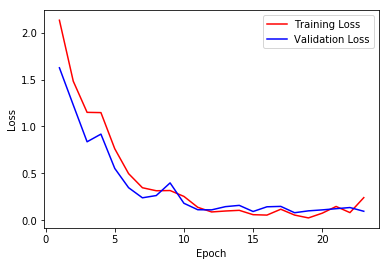

In [15]:
epoch_count=range(1,len(train_loss_all)+1)
plt.plot(epoch_count,train_loss_all,'r-')
plt.plot(epoch_count,val_loss_all,'b-')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [16]:
model = BasicLSTM(X_tr[0].shape[1], rnn_size, len(np.unique(y_tr)), num_layers, False)
model = load_checkpoint('./lab2_lstm.pt', model)

In [20]:
#accuracy score for validation set
pred_val, labels_y_val, _, _ = eval_pred(X_val,y_val)
f1 = accuracy_score(labels_y_val, pred_val)
print('Score in validation set is: %d %%' % (100 * f1))

Score in validation set is: 97 %


In [22]:
#accuracy score for test set
pred_test, labels_y_test, _, _ = eval_pred(X_test,y_test)
f1 = accuracy_score(labels_y_test, pred_test)
print('Score in test set is: %d %%' % (100 * f1))

Score in test set is: 96 %


Confusion matrix, without normalization
[[26  0  1  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 2  0 25  0  0  0  0  0  0  0]
 [ 0  0  1 26  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 25  1  1  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0 26  1]
 [ 0  0  0  0  0  1  0  0  0 26]]


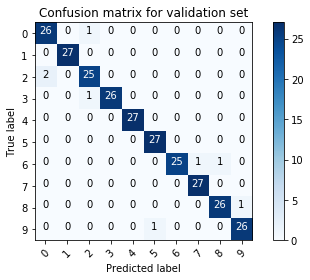

In [21]:
#confusion matrix for val set
classes = np.unique(y_val)
cm = confusion_matrix(labels_y_val, pred_val,classes)
fig = plt.figure()
title='Confusion matrix for validation set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

Confusion matrix, without normalization
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  1  0  0  0  0 14  0]
 [ 0  0  0  0  0  2  0  0  0 13]]


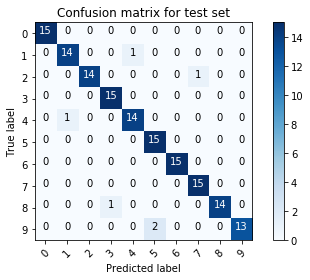

In [23]:
#confusion matrix for test set
classes = np.unique(y_test)
cm = confusion_matrix(labels_y_test, pred_test,classes)
fig = plt.figure()
title='Confusion matrix for test set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

# Bidirectional LSTM #
Για τη μετατροπή του Basic LSTM σε Bidirectional δίνουμε κατά την κλήση του μοντέλου στην παράμετρο bidirection την τιμή True (για το απλό LSTM δίναμε false). Επίσης, στο εσωτερικό της init στην περίπτωση που έχουμε bidirectional=True διπλασιάζουμε το hidden size που δίνεται ως όρισμα στο nn.Linear (που εφαρμόζεται στο forward) και επιπλέον τίθεται bidirectional=True κατά την κλήση του nn.LSTM. 

Τα Bidirectional LSTM συνδέουν δύο κρυφά στρώματα αντίθετων κατευθύνσεων με την ίδια έξοδο. Με αυτή τη μορφή, το στρώμα εξόδου μπορεί να πάρει ταυτόχρονα πληροφορίες από προηγούμενες και μελλοντικές καταστάσεις. Εισήχθησαν για να αυξήσουν την ποσότητα πληροφοριών εισόδου που είναι διαθέσιμες στο δίκτυο, γεγονός που καθιστά την εκπαίδευση και τα αποτελέσματα καλύτερα.

Παρακάτω χρησιμοποιούνται οι ίδιες υπερπαράμετροι που χρησιμοποιήθηκαν για το Basic LSTM, με τη διαφορά ότι μειώσαμε το πλήθος των εποχών, μιας και η επίδοση του δικτύου βελτιώνεται γρηγορότερα από πριν. Στη συνέχεια, τυπώνεται το training και το validation loss σε κάθε εποχή και το διάγραμμα του σφάλματος στο training set και το validation set για κάθε εποχή εκπαίδευσης. Παρουσιάζονται τα ποσοστό επιτυχίας του καλύτερου μοντέλου στο validation και στο test set, καθώς και τα αντίστοιχα confusion matrices.

In [13]:
rnn_size = 50
num_layers = 2

model = BasicLSTM(X_tr[0].shape[1], rnn_size, len(np.unique(y_tr)), num_layers, True)

print('Training Loop for Bidirectional LSTM')

epochs = 20
batch_size = 30
LR = 1.0
best_score = 0

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.000001,lr=LR)
earlystopping = EarlyStopping(mode='max', min_delta=0.01, patience=3)


train_loss_all=[]
val_loss_all=[]
idx = np.arange(len(X_tr))    

for epoch in range(epochs):
    np.random.shuffle(idx)
    X_tr = [X_tr[i] for i in idx]
    y_tr = [y_tr[i] for i in idx]
    
    #train loop
    current_batch = 0
    train_loss = 0.0

    for iteration in range(len(y_tr) // batch_size):
        batch_x = X_tr[current_batch: current_batch + batch_size]
        batch_y = y_tr[current_batch: current_batch + batch_size]
        
        current_batch += batch_size
        optimizer.zero_grad()
            
        if len(batch_x) > 0:
            output,y = get_pred(batch_x,batch_y)
            loss = criterion(output,y)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + loss
    train_loss_all.append(train_loss/(len(X_tr)/batch_size))
    
    #validation loop
    batch_pred, labels_y, output_tensor, labels_tensor = eval_pred(X_val,y_val)
    val_loss = criterion(output_tensor,labels_tensor)
    val_loss_all.append(val_loss)
    #f1 = f1_score(labels_y, batch_pred, average='weighted')
    f1 = accuracy_score(labels_y, batch_pred)
    if (f1 > best_score):
        best_score = f1
        save_checkpoint(model, 'lab2_bidirectional_lstm.pt')
        
    
    print ('Epoch %d from %d, Train loss: %.2f' %(epoch + 1, epochs, train_loss/(len(X_tr)/batch_size)))
    print ('Epoch %d from %d, Validation loss: %.2f' %(epoch + 1, epochs, val_loss))
    print('Score in validation set is: %d %%' % (100 * f1))
    print('--------------------------------')
    
    if(earlystopping.step(f1) is True):
        print('Early stopping the training cycle on epoch %d.' %(epoch+1))
        print('Best score %d %%' % (100 * best_score) )
        break

Training Loop for Bidirectional LSTM
Epoch 1 from 20, Train loss: 1.75
Epoch 1 from 20, Validation loss: 0.91
Score in validation set is: 68 %
--------------------------------
Epoch 2 from 20, Train loss: 0.61
Epoch 2 from 20, Validation loss: 0.32
Score in validation set is: 90 %
--------------------------------
Epoch 3 from 20, Train loss: 0.31
Epoch 3 from 20, Validation loss: 0.35
Score in validation set is: 90 %
--------------------------------
Epoch 4 from 20, Train loss: 0.18
Epoch 4 from 20, Validation loss: 0.15
Score in validation set is: 94 %
--------------------------------
Epoch 5 from 20, Train loss: 0.17
Epoch 5 from 20, Validation loss: 0.23
Score in validation set is: 95 %
--------------------------------
Epoch 6 from 20, Train loss: 0.11
Epoch 6 from 20, Validation loss: 0.16
Score in validation set is: 94 %
--------------------------------
Epoch 7 from 20, Train loss: 0.09
Epoch 7 from 20, Validation loss: 0.11
Score in validation set is: 97 %
-----------------------

In [14]:
model = BasicLSTM(X_tr[0].shape[1], rnn_size, len(np.unique(y_tr)), num_layers, True)
model = load_checkpoint('lab2_bidirectional_lstm.pt', model)

Text(0, 0.5, 'Loss')

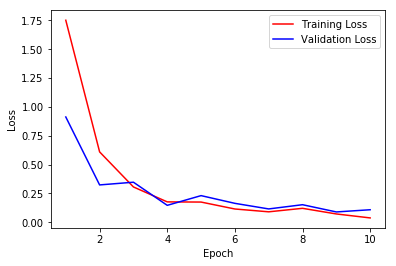

In [15]:
epoch_count=range(1,len(train_loss_all)+1)
plt.plot(epoch_count,train_loss_all,'r-')
plt.plot(epoch_count,val_loss_all,'b-')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [16]:
#accuracy score for validation set
pred_val, labels_y_val, _, _ = eval_pred(X_val,y_val)
f1 = accuracy_score(labels_y_val, pred_val)
print('Score in validation set is: %d %%' % (100 * f1))

Score in validation set is: 98 %


Confusion matrix, without normalization
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  1  0]
 [ 0  0  1 26  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  1  0 25  1]
 [ 0  0  0  0  0  0  0  0  0 27]]


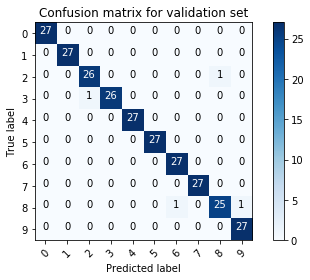

In [17]:
#confusion matrix for val set
classes = np.unique(y_val)
cm = confusion_matrix(labels_y_val, pred_val,classes)
fig = plt.figure()
title='Confusion matrix for validation set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

In [18]:
#accuracy score for test set
pred_test, labels_y_test, _, _ = eval_pred(X_test,y_test)
f1 = accuracy_score(labels_y_test, pred_test)
print('Score in test set is: %d %%' % (100 * f1))

Score in test set is: 99 %


Confusion matrix, without normalization
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  1  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


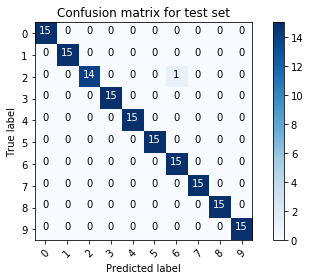

In [19]:
#confusion matrix for test set
classes = np.unique(y_test)
cm = confusion_matrix(labels_y_test, pred_test,classes)
fig = plt.figure()
title='Confusion matrix for test set'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

In [ ]:
plt.show()